In [144]:
#Import required libraries
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
from math import sqrt
import tensorflow as tf
from tensorflow import keras
import tensorflow_docs.plots
import tensorflow_docs.modeling
import matplotlib.pyplot as plt
import tensorflow_docs as tfdocs
from tensorflow.keras import layers
from sklearn.metrics import r2_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_log_error

In [145]:
#Read The Dataset
Gangetic_West_Bengal_dataset = pd.read_csv('dataset/Gangetic West Bengal Rainfall Dataset.csv')

In [146]:
#View The Dataset
Gangetic_West_Bengal_dataset

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,1901,37.1,58.4,3.9,64.1,121.7,198.0,280.8,275.7,313.5,51.1,83.4,0.0,1487.6,95.5,189.7,1068.0,134.4
1,1902,0.0,1.2,44.2,103.8,161.6,140.9,347.8,264.8,230.5,32.5,10.4,9.9,1347.7,1.2,309.6,984.0,52.9
2,1903,17.5,24.6,37.3,30.6,78.5,201.7,179.6,277.6,300.7,198.0,8.2,0.0,1354.3,42.1,146.4,959.6,206.2
3,1904,0.1,23.9,35.6,17.5,160.2,286.7,435.3,241.7,142.8,35.1,4.1,0.1,1383.1,24.0,213.3,1106.4,39.3
4,1905,30.9,49.6,84.7,84.9,156.8,70.9,525.5,263.6,287.6,107.3,0.0,5.2,1666.9,80.5,326.3,1147.6,112.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2013,2.5,10.0,4.8,45.6,195.9,233.4,263.2,401.4,254.0,353.2,0.0,0.0,1764.1,12.5,246.3,1152.0,353.3
113,2014,0.9,42.2,19.9,1.9,124.4,193.6,298.7,292.6,229.5,56.9,0.1,0.6,1261.4,43.1,146.2,1014.4,57.7
114,2015,12.9,5.5,19.3,88.7,57.6,247.2,633.1,260.6,164.0,32.7,2.3,6.3,1530.3,18.4,165.6,1304.9,41.3
115,2016,9.9,37.9,14.7,5.8,111.9,172.7,334.7,416.7,233.7,69.8,19.2,0.0,1427.0,47.8,132.4,1157.8,89.0


In [147]:
#Dataset info
Gangetic_West_Bengal_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    117 non-null    int64  
 1   JAN     117 non-null    float64
 2   FEB     117 non-null    float64
 3   MAR     117 non-null    float64
 4   APR     117 non-null    float64
 5   MAY     117 non-null    float64
 6   JUN     117 non-null    float64
 7   JUL     117 non-null    float64
 8   AUG     117 non-null    float64
 9   SEP     117 non-null    float64
 10  OCT     117 non-null    float64
 11  NOV     117 non-null    float64
 12  DEC     117 non-null    float64
 13  ANNUAL  117 non-null    float64
 14  JF      117 non-null    float64
 15  MAM     117 non-null    float64
 16  JJAS    117 non-null    float64
 17  OND     117 non-null    float64
dtypes: float64(17), int64(1)
memory usage: 16.6 KB


In [148]:
#Drop Unnecessary attributes
temp_data = pd.DataFrame(Gangetic_West_Bengal_dataset)
temp_dataset = temp_data.drop(['JF', 'MAM', 'JJAS', 'OND'], axis = 1)

In [149]:
temp_dataset

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
0,1901,37.1,58.4,3.9,64.1,121.7,198.0,280.8,275.7,313.5,51.1,83.4,0.0,1487.6
1,1902,0.0,1.2,44.2,103.8,161.6,140.9,347.8,264.8,230.5,32.5,10.4,9.9,1347.7
2,1903,17.5,24.6,37.3,30.6,78.5,201.7,179.6,277.6,300.7,198.0,8.2,0.0,1354.3
3,1904,0.1,23.9,35.6,17.5,160.2,286.7,435.3,241.7,142.8,35.1,4.1,0.1,1383.1
4,1905,30.9,49.6,84.7,84.9,156.8,70.9,525.5,263.6,287.6,107.3,0.0,5.2,1666.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2013,2.5,10.0,4.8,45.6,195.9,233.4,263.2,401.4,254.0,353.2,0.0,0.0,1764.1
113,2014,0.9,42.2,19.9,1.9,124.4,193.6,298.7,292.6,229.5,56.9,0.1,0.6,1261.4
114,2015,12.9,5.5,19.3,88.7,57.6,247.2,633.1,260.6,164.0,32.7,2.3,6.3,1530.3
115,2016,9.9,37.9,14.7,5.8,111.9,172.7,334.7,416.7,233.7,69.8,19.2,0.0,1427.0


In [150]:
#Clean The Dataset
print(temp_dataset.isnull().sum())

YEAR      0
JAN       0
FEB       0
MAR       0
APR       0
MAY       0
JUN       0
JUL       0
AUG       0
SEP       0
OCT       0
NOV       0
DEC       0
ANNUAL    0
dtype: int64


In [151]:
#Plot The Dataset

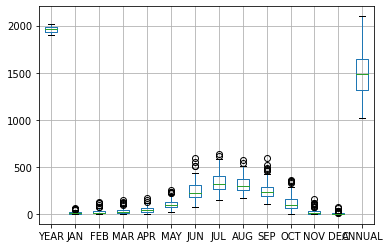

In [152]:
#Boxplot
temp_dataset.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f224bd1b828>,
      dtype=object)

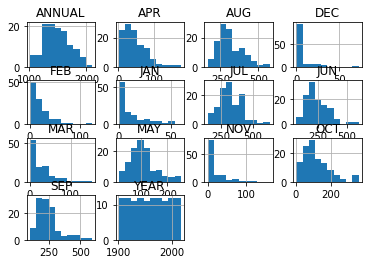

In [153]:
#histogram 
temp_dataset.hist()

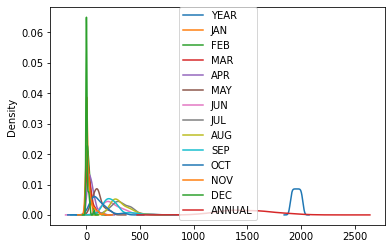

In [154]:
#Kernel Density Estimation
temp_dataset.plot.kde()

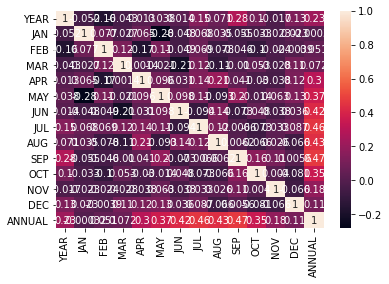

In [155]:
sns.heatmap(temp_dataset.corr(),annot=True)

In [156]:
#Preprocess The Data
dataset = pd.get_dummies(temp_dataset, prefix='', prefix_sep='')

In [157]:
#Split the data into train and test
train_dataset = dataset.sample(frac=0.7, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [158]:
print('Train dataset shape :', train_dataset.shape)
print('Test dataset shape :',test_dataset.shape)

Train dataset shape : (82, 14)
Test dataset shape : (35, 14)


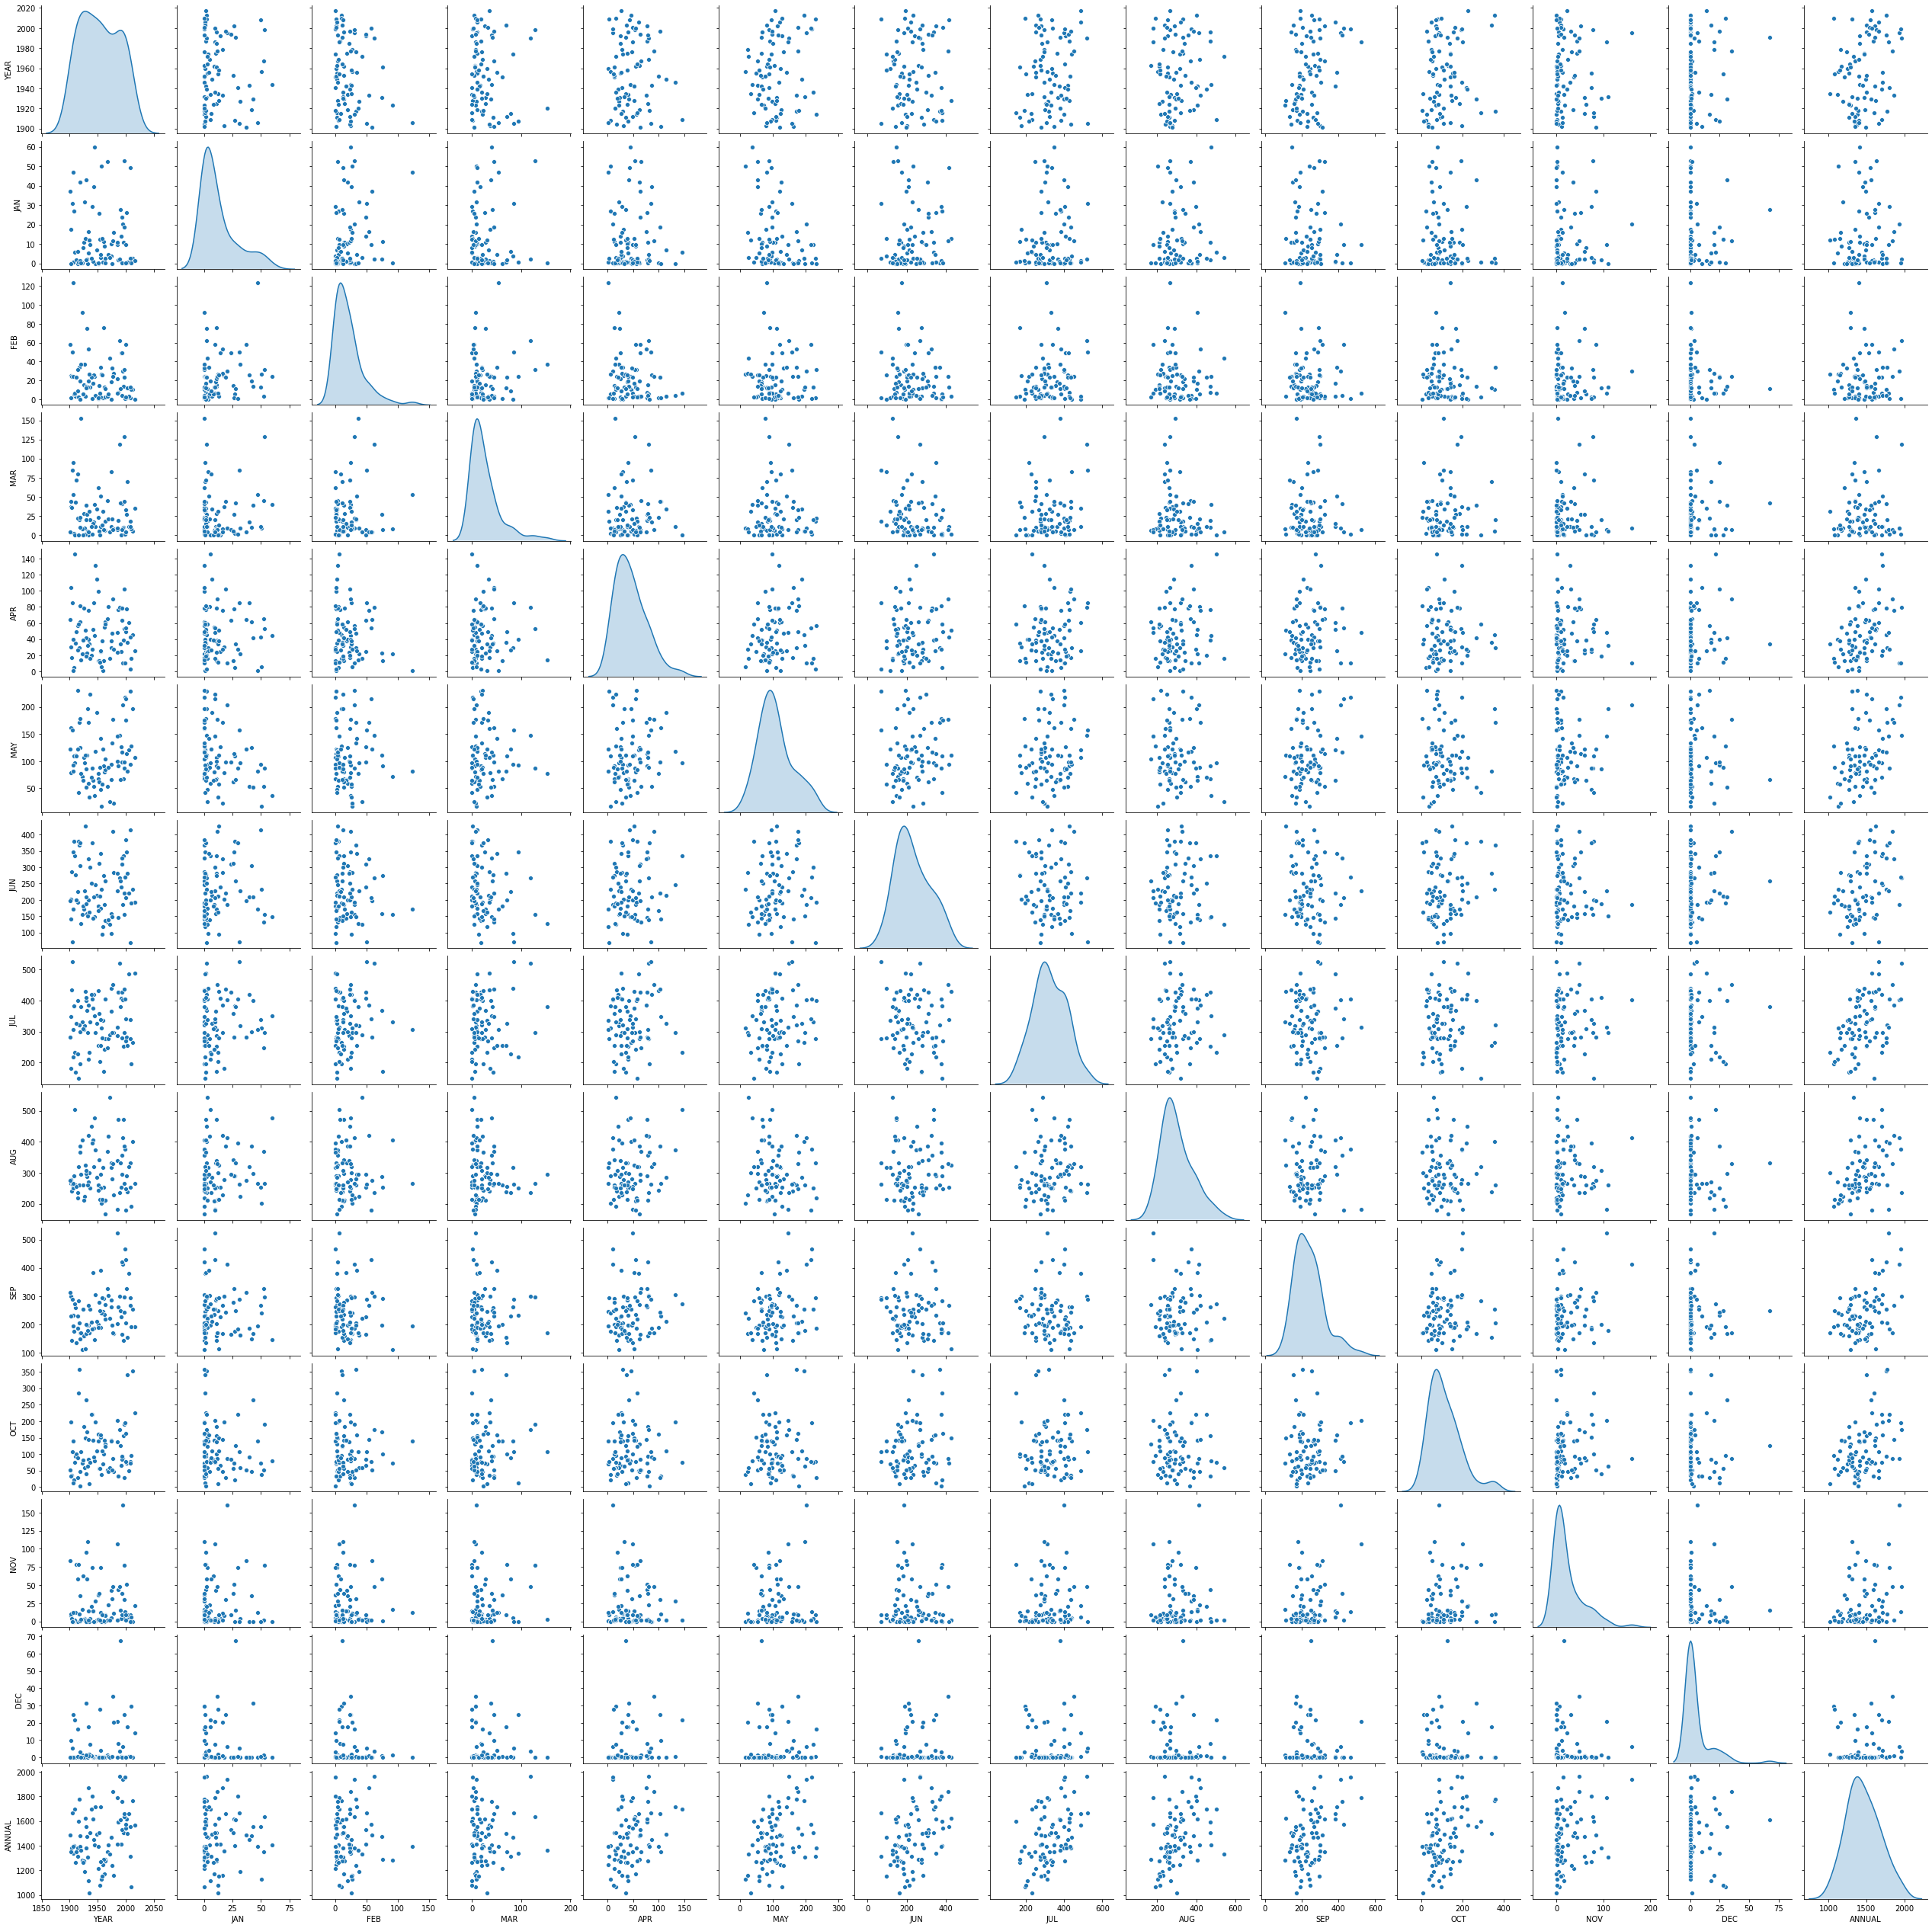

In [159]:
#Inspect the Train Data
sns.pairplot(train_dataset[['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']], diag_kind="kde")
plt.show()

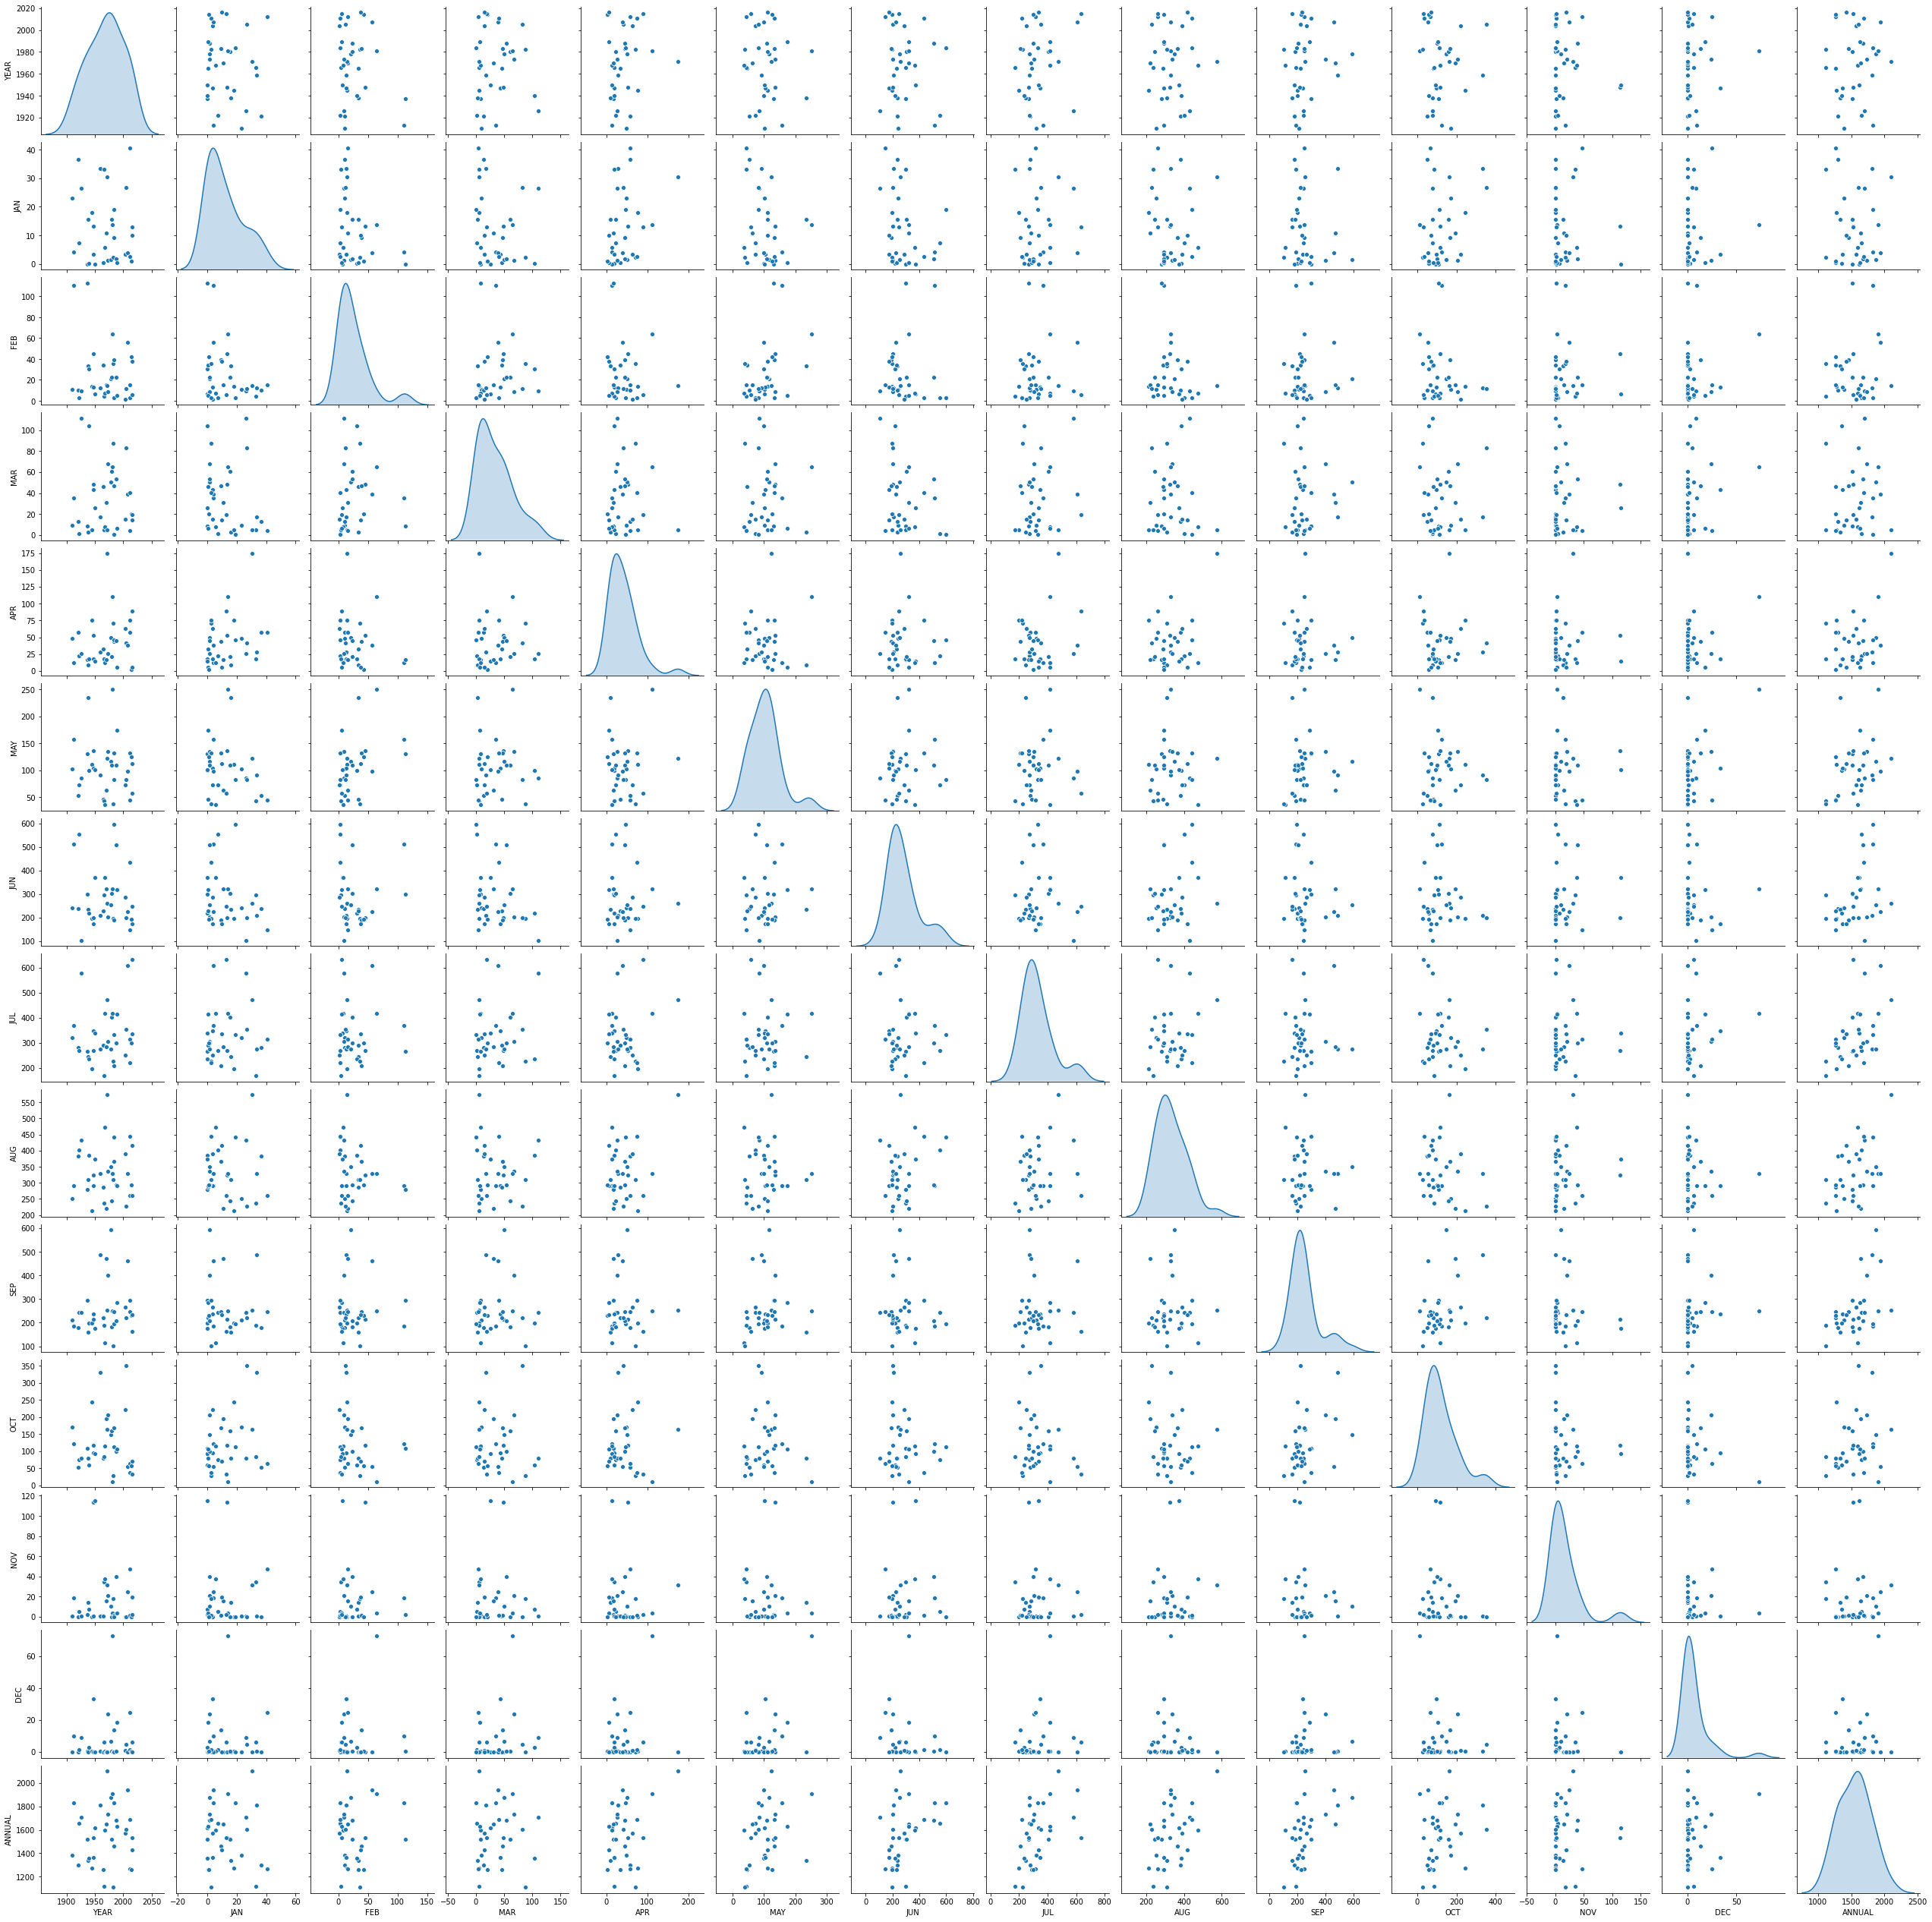

In [160]:
#Inspect the Test Data
sns.pairplot(test_dataset[['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']], diag_kind="kde")
plt.show()

In [161]:
#Actual Annual Rainfall
actual = test_dataset['ANNUAL']
year = test_dataset['YEAR']

In [162]:
#The Overall Statistics of Total Data
statistics = temp_dataset.describe()
statistics = statistics.transpose()
print('Overall Statistics of Total Data:')
statistics

Overall Statistics of Total Data:


,count,mean,std,min,25%,50%,75%,max
YEAR,117.0,1959.000000,33.919021,1901.0,1930.0,1959.0,1988.0,2017.0
JAN,117.0,12.476923,14.652759,0.0,1.3,6.8,18.0,60.0
FEB,117.0,22.392308,24.089875,0.0,5.1,13.6,31.0,123.6
MAR,117.0,29.019658,30.522590,0.1,7.3,18.9,41.7,152.5
APR,117.0,44.388034,31.791132,0.9,20.2,38.7,60.5,174.2
MAY,117.0,107.810256,50.561489,16.4,72.3,99.6,130.3,250.9
JUN,117.0,246.102564,99.173371,69.7,180.7,226.3,303.6,597.1
JUL,117.0,327.841026,92.699865,148.9,269.3,313.4,398.6,633.1
AUG,117.0,311.882051,81.208123,167.1,252.8,292.6,366.8,573.4
SEP,117.0,245.143590,89.336356,101.1,186.8,229.5,283.8,591.8


In [163]:
#The Overall Statistics of Training Data
train_stats = train_dataset.describe()
train_stats.pop('ANNUAL')
train_stats = train_stats.transpose()
print('Overall Statistics of Training Data:')
train_stats

Overall Statistics of Training Data:


,count,mean,std,min,25%,50%,75%,max
YEAR,82.0,1954.695122,34.235816,1901.0,1925.500,1953.50,1986.750,2017.0
JAN,82.0,12.591463,15.661884,0.0,0.900,5.85,17.200,60.0
FEB,82.0,21.198780,22.853611,0.0,3.900,13.20,27.125,123.6
MAR,82.0,26.840244,30.495103,0.1,7.150,17.40,36.875,152.5
APR,82.0,45.686585,30.581669,0.9,23.050,39.45,61.750,145.2
MAY,82.0,109.223171,51.477302,16.4,72.875,98.10,131.700,230.9
JUN,82.0,231.317073,86.854031,69.7,164.400,212.80,285.750,427.0
JUL,82.0,327.314634,84.769859,148.9,276.550,319.60,400.250,525.5
AUG,82.0,303.239024,80.374395,167.1,251.525,286.10,342.475,543.2
SEP,82.0,241.780488,81.130207,110.1,186.500,229.90,285.675,522.2


In [164]:
#The Overall Statistics of Test Data
test_stats = test_dataset.describe()
test_stats.pop('ANNUAL')
test_stats = test_stats.transpose()
print('Overall Statistics of Test Data:')
test_stats

Overall Statistics of Test Data:


,count,mean,std,min,25%,50%,75%,max
YEAR,35.0,1969.085714,31.360683,1910.0,1946.00,1971.0,1988.50,2016.0
JAN,35.0,12.208571,12.166888,0.0,2.05,9.1,18.55,40.7
FEB,35.0,25.188571,26.910306,1.6,8.25,14.2,34.85,112.8
MAR,35.0,34.125714,30.409387,0.6,8.15,25.9,49.45,111.3
APR,35.0,41.345714,34.735084,1.9,17.55,32.8,55.00,174.2
MAY,35.0,104.500000,48.917608,35.5,72.60,101.7,127.35,250.9
JUN,35.0,280.742857,117.566465,103.7,200.25,241.8,319.80,597.1
JUL,35.0,329.074286,110.437971,168.7,267.00,299.9,361.10,633.1
AUG,35.0,332.131429,80.668475,213.2,283.70,323.6,383.20,573.4
SEP,35.0,253.022857,107.038050,101.1,191.80,229.5,258.55,591.8


In [165]:
#Labeling The datasets
train_labels = train_dataset.pop('ANNUAL')
test_labels = test_dataset.pop('ANNUAL')

In [166]:
#Convolutional Neural Network(CNN) building 
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
 
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()

In [167]:
print('Model Sructure:')
model.summary()

Model Sructure:
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_21 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 65        
Total params: 9,281
Trainable params: 9,281
Non-trainable params: 0
_________________________________________________________________


In [168]:
#Test the Network
example = train_dataset[:10]
result = model.predict(example)
print('Prediction Test:')
print(result)

Prediction Test:
[[189.11707]
 [203.08429]
 [200.031  ]
 [217.92352]
 [236.97821]
 [224.41206]
 [209.15588]
 [175.04701]
 [188.20572]
 [212.09023]]


In [169]:
ch_path = ('save/cp.ckpt')
cp_dir = os.path.dirname(ch_path)

In [170]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(ch_path,
                                                 save_weights_only = True,
                                                 verbose = 1)
model = build_model()

In [171]:
#Train the model
EPOCHS = 10000

history = model.fit(
  train_dataset, train_labels, batch_size=32,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots(), cp_callback])


Epoch: 0, loss:2057146.0000,  mae:1413.1166,  mse:2057146.0000,  val_loss:1224513.6250,  val_mae:1084.7343,  val_mse:1224513.6250,  
.
Epoch 00001: saving model to save/cp.ckpt
.
Epoch 00002: saving model to save/cp.ckpt
.
Epoch 00003: saving model to save/cp.ckpt
.
Epoch 00004: saving model to save/cp.ckpt
.
Epoch 00005: saving model to save/cp.ckpt
.
Epoch 00006: saving model to save/cp.ckpt
.
Epoch 00007: saving model to save/cp.ckpt
.
Epoch 00008: saving model to save/cp.ckpt
.
Epoch 00009: saving model to save/cp.ckpt
.
Epoch 00010: saving model to save/cp.ckpt
.
Epoch 00011: saving model to save/cp.ckpt
.
Epoch 00012: saving model to save/cp.ckpt
.
Epoch 00013: saving model to save/cp.ckpt
.
Epoch 00014: saving model to save/cp.ckpt
.
Epoch 00015: saving model to save/cp.ckpt
.
Epoch 00016: saving model to save/cp.ckpt
.
Epoch 00017: saving model to save/cp.ckpt
.
Epoch 00018: saving model to save/cp.ckpt
.
Epoch 00019: saving model to save/cp.ckpt
.
Epoch 00020: saving model to

.
Epoch 00184: saving model to save/cp.ckpt
.
Epoch 00185: saving model to save/cp.ckpt
.
Epoch 00186: saving model to save/cp.ckpt
.
Epoch 00187: saving model to save/cp.ckpt
.
Epoch 00188: saving model to save/cp.ckpt
.
Epoch 00189: saving model to save/cp.ckpt
.
Epoch 00190: saving model to save/cp.ckpt
.
Epoch 00191: saving model to save/cp.ckpt
.
Epoch 00192: saving model to save/cp.ckpt
.
Epoch 00193: saving model to save/cp.ckpt
.
Epoch 00194: saving model to save/cp.ckpt
.
Epoch 00195: saving model to save/cp.ckpt
.
Epoch 00196: saving model to save/cp.ckpt
.
Epoch 00197: saving model to save/cp.ckpt
.
Epoch 00198: saving model to save/cp.ckpt
.
Epoch 00199: saving model to save/cp.ckpt
.
Epoch 00200: saving model to save/cp.ckpt

Epoch: 200, loss:5848.1499,  mae:69.7786,  mse:5848.1499,  val_loss:8326.4336,  val_mae:82.5421,  val_mse:8326.4336,  
.
Epoch 00201: saving model to save/cp.ckpt
.
Epoch 00202: saving model to save/cp.ckpt
.
Epoch 00203: saving model to save/cp.ckpt


.
Epoch 00367: saving model to save/cp.ckpt
.
Epoch 00368: saving model to save/cp.ckpt
.
Epoch 00369: saving model to save/cp.ckpt
.
Epoch 00370: saving model to save/cp.ckpt
.
Epoch 00371: saving model to save/cp.ckpt
.
Epoch 00372: saving model to save/cp.ckpt
.
Epoch 00373: saving model to save/cp.ckpt
.
Epoch 00374: saving model to save/cp.ckpt
.
Epoch 00375: saving model to save/cp.ckpt
.
Epoch 00376: saving model to save/cp.ckpt
.
Epoch 00377: saving model to save/cp.ckpt
.
Epoch 00378: saving model to save/cp.ckpt
.
Epoch 00379: saving model to save/cp.ckpt
.
Epoch 00380: saving model to save/cp.ckpt
.
Epoch 00381: saving model to save/cp.ckpt
.
Epoch 00382: saving model to save/cp.ckpt
.
Epoch 00383: saving model to save/cp.ckpt
.
Epoch 00384: saving model to save/cp.ckpt
.
Epoch 00385: saving model to save/cp.ckpt
.
Epoch 00386: saving model to save/cp.ckpt
.
Epoch 00387: saving model to save/cp.ckpt
.
Epoch 00388: saving model to save/cp.ckpt
.
Epoch 00389: saving model to s

.
Epoch 00548: saving model to save/cp.ckpt
.
Epoch 00549: saving model to save/cp.ckpt
.
Epoch 00550: saving model to save/cp.ckpt
.
Epoch 00551: saving model to save/cp.ckpt
.
Epoch 00552: saving model to save/cp.ckpt
.
Epoch 00553: saving model to save/cp.ckpt
.
Epoch 00554: saving model to save/cp.ckpt
.
Epoch 00555: saving model to save/cp.ckpt
.
Epoch 00556: saving model to save/cp.ckpt
.
Epoch 00557: saving model to save/cp.ckpt
.
Epoch 00558: saving model to save/cp.ckpt
.
Epoch 00559: saving model to save/cp.ckpt
.
Epoch 00560: saving model to save/cp.ckpt
.
Epoch 00561: saving model to save/cp.ckpt
.
Epoch 00562: saving model to save/cp.ckpt
.
Epoch 00563: saving model to save/cp.ckpt
.
Epoch 00564: saving model to save/cp.ckpt
.
Epoch 00565: saving model to save/cp.ckpt
.
Epoch 00566: saving model to save/cp.ckpt
.
Epoch 00567: saving model to save/cp.ckpt
.
Epoch 00568: saving model to save/cp.ckpt
.
Epoch 00569: saving model to save/cp.ckpt
.
Epoch 00570: saving model to s

.
Epoch 00730: saving model to save/cp.ckpt
.
Epoch 00731: saving model to save/cp.ckpt
.
Epoch 00732: saving model to save/cp.ckpt
.
Epoch 00733: saving model to save/cp.ckpt
.
Epoch 00734: saving model to save/cp.ckpt
.
Epoch 00735: saving model to save/cp.ckpt
.
Epoch 00736: saving model to save/cp.ckpt
.
Epoch 00737: saving model to save/cp.ckpt
.
Epoch 00738: saving model to save/cp.ckpt
.
Epoch 00739: saving model to save/cp.ckpt
.
Epoch 00740: saving model to save/cp.ckpt
.
Epoch 00741: saving model to save/cp.ckpt
.
Epoch 00742: saving model to save/cp.ckpt
.
Epoch 00743: saving model to save/cp.ckpt
.
Epoch 00744: saving model to save/cp.ckpt
.
Epoch 00745: saving model to save/cp.ckpt
.
Epoch 00746: saving model to save/cp.ckpt
.
Epoch 00747: saving model to save/cp.ckpt
.
Epoch 00748: saving model to save/cp.ckpt
.
Epoch 00749: saving model to save/cp.ckpt
.
Epoch 00750: saving model to save/cp.ckpt
.
Epoch 00751: saving model to save/cp.ckpt
.
Epoch 00752: saving model to s

.
Epoch 00911: saving model to save/cp.ckpt
.
Epoch 00912: saving model to save/cp.ckpt
.
Epoch 00913: saving model to save/cp.ckpt
.
Epoch 00914: saving model to save/cp.ckpt
.
Epoch 00915: saving model to save/cp.ckpt
.
Epoch 00916: saving model to save/cp.ckpt
.
Epoch 00917: saving model to save/cp.ckpt
.
Epoch 00918: saving model to save/cp.ckpt
.
Epoch 00919: saving model to save/cp.ckpt
.
Epoch 00920: saving model to save/cp.ckpt
.
Epoch 00921: saving model to save/cp.ckpt
.
Epoch 00922: saving model to save/cp.ckpt
.
Epoch 00923: saving model to save/cp.ckpt
.
Epoch 00924: saving model to save/cp.ckpt
.
Epoch 00925: saving model to save/cp.ckpt
.
Epoch 00926: saving model to save/cp.ckpt
.
Epoch 00927: saving model to save/cp.ckpt
.
Epoch 00928: saving model to save/cp.ckpt
.
Epoch 00929: saving model to save/cp.ckpt
.
Epoch 00930: saving model to save/cp.ckpt
.
Epoch 00931: saving model to save/cp.ckpt
.
Epoch 00932: saving model to save/cp.ckpt
.
Epoch 00933: saving model to s

.
Epoch 01097: saving model to save/cp.ckpt
.
Epoch 01098: saving model to save/cp.ckpt
.
Epoch 01099: saving model to save/cp.ckpt
.
Epoch 01100: saving model to save/cp.ckpt

Epoch: 1100, loss:695.1955,  mae:25.8632,  mse:695.1955,  val_loss:449.7350,  val_mae:20.1496,  val_mse:449.7350,  
.
Epoch 01101: saving model to save/cp.ckpt
.
Epoch 01102: saving model to save/cp.ckpt
.
Epoch 01103: saving model to save/cp.ckpt
.
Epoch 01104: saving model to save/cp.ckpt
.
Epoch 01105: saving model to save/cp.ckpt
.
Epoch 01106: saving model to save/cp.ckpt
.
Epoch 01107: saving model to save/cp.ckpt
.
Epoch 01108: saving model to save/cp.ckpt
.
Epoch 01109: saving model to save/cp.ckpt
.
Epoch 01110: saving model to save/cp.ckpt
.
Epoch 01111: saving model to save/cp.ckpt
.
Epoch 01112: saving model to save/cp.ckpt
.
Epoch 01113: saving model to save/cp.ckpt
.
Epoch 01114: saving model to save/cp.ckpt
.
Epoch 01115: saving model to save/cp.ckpt
.
Epoch 01116: saving model to save/cp.ckpt
.
E

.
Epoch 01278: saving model to save/cp.ckpt
.
Epoch 01279: saving model to save/cp.ckpt
.
Epoch 01280: saving model to save/cp.ckpt
.
Epoch 01281: saving model to save/cp.ckpt
.
Epoch 01282: saving model to save/cp.ckpt
.
Epoch 01283: saving model to save/cp.ckpt
.
Epoch 01284: saving model to save/cp.ckpt
.
Epoch 01285: saving model to save/cp.ckpt
.
Epoch 01286: saving model to save/cp.ckpt
.
Epoch 01287: saving model to save/cp.ckpt
.
Epoch 01288: saving model to save/cp.ckpt
.
Epoch 01289: saving model to save/cp.ckpt
.
Epoch 01290: saving model to save/cp.ckpt
.
Epoch 01291: saving model to save/cp.ckpt
.
Epoch 01292: saving model to save/cp.ckpt
.
Epoch 01293: saving model to save/cp.ckpt
.
Epoch 01294: saving model to save/cp.ckpt
.
Epoch 01295: saving model to save/cp.ckpt
.
Epoch 01296: saving model to save/cp.ckpt
.
Epoch 01297: saving model to save/cp.ckpt
.
Epoch 01298: saving model to save/cp.ckpt
.
Epoch 01299: saving model to save/cp.ckpt
.
Epoch 01300: saving model to s

.
Epoch 01461: saving model to save/cp.ckpt
.
Epoch 01462: saving model to save/cp.ckpt
.
Epoch 01463: saving model to save/cp.ckpt
.
Epoch 01464: saving model to save/cp.ckpt
.
Epoch 01465: saving model to save/cp.ckpt
.
Epoch 01466: saving model to save/cp.ckpt
.
Epoch 01467: saving model to save/cp.ckpt
.
Epoch 01468: saving model to save/cp.ckpt
.
Epoch 01469: saving model to save/cp.ckpt
.
Epoch 01470: saving model to save/cp.ckpt
.
Epoch 01471: saving model to save/cp.ckpt
.
Epoch 01472: saving model to save/cp.ckpt
.
Epoch 01473: saving model to save/cp.ckpt
.
Epoch 01474: saving model to save/cp.ckpt
.
Epoch 01475: saving model to save/cp.ckpt
.
Epoch 01476: saving model to save/cp.ckpt
.
Epoch 01477: saving model to save/cp.ckpt
.
Epoch 01478: saving model to save/cp.ckpt
.
Epoch 01479: saving model to save/cp.ckpt
.
Epoch 01480: saving model to save/cp.ckpt
.
Epoch 01481: saving model to save/cp.ckpt
.
Epoch 01482: saving model to save/cp.ckpt
.
Epoch 01483: saving model to s

.
Epoch 01642: saving model to save/cp.ckpt
.
Epoch 01643: saving model to save/cp.ckpt
.
Epoch 01644: saving model to save/cp.ckpt
.
Epoch 01645: saving model to save/cp.ckpt
.
Epoch 01646: saving model to save/cp.ckpt
.
Epoch 01647: saving model to save/cp.ckpt
.
Epoch 01648: saving model to save/cp.ckpt
.
Epoch 01649: saving model to save/cp.ckpt
.
Epoch 01650: saving model to save/cp.ckpt
.
Epoch 01651: saving model to save/cp.ckpt
.
Epoch 01652: saving model to save/cp.ckpt
.
Epoch 01653: saving model to save/cp.ckpt
.
Epoch 01654: saving model to save/cp.ckpt
.
Epoch 01655: saving model to save/cp.ckpt
.
Epoch 01656: saving model to save/cp.ckpt
.
Epoch 01657: saving model to save/cp.ckpt
.
Epoch 01658: saving model to save/cp.ckpt
.
Epoch 01659: saving model to save/cp.ckpt
.
Epoch 01660: saving model to save/cp.ckpt
.
Epoch 01661: saving model to save/cp.ckpt
.
Epoch 01662: saving model to save/cp.ckpt
.
Epoch 01663: saving model to save/cp.ckpt
.
Epoch 01664: saving model to s

.
Epoch 01824: saving model to save/cp.ckpt
.
Epoch 01825: saving model to save/cp.ckpt
.
Epoch 01826: saving model to save/cp.ckpt
.
Epoch 01827: saving model to save/cp.ckpt
.
Epoch 01828: saving model to save/cp.ckpt
.
Epoch 01829: saving model to save/cp.ckpt
.
Epoch 01830: saving model to save/cp.ckpt
.
Epoch 01831: saving model to save/cp.ckpt
.
Epoch 01832: saving model to save/cp.ckpt
.
Epoch 01833: saving model to save/cp.ckpt
.
Epoch 01834: saving model to save/cp.ckpt
.
Epoch 01835: saving model to save/cp.ckpt
.
Epoch 01836: saving model to save/cp.ckpt
.
Epoch 01837: saving model to save/cp.ckpt
.
Epoch 01838: saving model to save/cp.ckpt
.
Epoch 01839: saving model to save/cp.ckpt
.
Epoch 01840: saving model to save/cp.ckpt
.
Epoch 01841: saving model to save/cp.ckpt
.
Epoch 01842: saving model to save/cp.ckpt
.
Epoch 01843: saving model to save/cp.ckpt
.
Epoch 01844: saving model to save/cp.ckpt
.
Epoch 01845: saving model to save/cp.ckpt
.
Epoch 01846: saving model to s

.
Epoch 02007: saving model to save/cp.ckpt
.
Epoch 02008: saving model to save/cp.ckpt
.
Epoch 02009: saving model to save/cp.ckpt
.
Epoch 02010: saving model to save/cp.ckpt
.
Epoch 02011: saving model to save/cp.ckpt
.
Epoch 02012: saving model to save/cp.ckpt
.
Epoch 02013: saving model to save/cp.ckpt
.
Epoch 02014: saving model to save/cp.ckpt
.
Epoch 02015: saving model to save/cp.ckpt
.
Epoch 02016: saving model to save/cp.ckpt
.
Epoch 02017: saving model to save/cp.ckpt
.
Epoch 02018: saving model to save/cp.ckpt
.
Epoch 02019: saving model to save/cp.ckpt
.
Epoch 02020: saving model to save/cp.ckpt
.
Epoch 02021: saving model to save/cp.ckpt
.
Epoch 02022: saving model to save/cp.ckpt
.
Epoch 02023: saving model to save/cp.ckpt
.
Epoch 02024: saving model to save/cp.ckpt
.
Epoch 02025: saving model to save/cp.ckpt
.
Epoch 02026: saving model to save/cp.ckpt
.
Epoch 02027: saving model to save/cp.ckpt
.
Epoch 02028: saving model to save/cp.ckpt
.
Epoch 02029: saving model to s

.
Epoch 02193: saving model to save/cp.ckpt
.
Epoch 02194: saving model to save/cp.ckpt
.
Epoch 02195: saving model to save/cp.ckpt
.
Epoch 02196: saving model to save/cp.ckpt
.
Epoch 02197: saving model to save/cp.ckpt
.
Epoch 02198: saving model to save/cp.ckpt
.
Epoch 02199: saving model to save/cp.ckpt
.
Epoch 02200: saving model to save/cp.ckpt

Epoch: 2200, loss:358.0053,  mae:18.3318,  mse:358.0053,  val_loss:510.8030,  val_mae:22.0929,  val_mse:510.8030,  
.
Epoch 02201: saving model to save/cp.ckpt
.
Epoch 02202: saving model to save/cp.ckpt
.
Epoch 02203: saving model to save/cp.ckpt
.
Epoch 02204: saving model to save/cp.ckpt
.
Epoch 02205: saving model to save/cp.ckpt
.
Epoch 02206: saving model to save/cp.ckpt
.
Epoch 02207: saving model to save/cp.ckpt
.
Epoch 02208: saving model to save/cp.ckpt
.
Epoch 02209: saving model to save/cp.ckpt
.
Epoch 02210: saving model to save/cp.ckpt
.
Epoch 02211: saving model to save/cp.ckpt
.
Epoch 02212: saving model to save/cp.ckpt
.
E

.
Epoch 02375: saving model to save/cp.ckpt
.
Epoch 02376: saving model to save/cp.ckpt
.
Epoch 02377: saving model to save/cp.ckpt
.
Epoch 02378: saving model to save/cp.ckpt
.
Epoch 02379: saving model to save/cp.ckpt
.
Epoch 02380: saving model to save/cp.ckpt
.
Epoch 02381: saving model to save/cp.ckpt
.
Epoch 02382: saving model to save/cp.ckpt
.
Epoch 02383: saving model to save/cp.ckpt
.
Epoch 02384: saving model to save/cp.ckpt
.
Epoch 02385: saving model to save/cp.ckpt
.
Epoch 02386: saving model to save/cp.ckpt
.
Epoch 02387: saving model to save/cp.ckpt
.
Epoch 02388: saving model to save/cp.ckpt
.
Epoch 02389: saving model to save/cp.ckpt
.
Epoch 02390: saving model to save/cp.ckpt
.
Epoch 02391: saving model to save/cp.ckpt
.
Epoch 02392: saving model to save/cp.ckpt
.
Epoch 02393: saving model to save/cp.ckpt
.
Epoch 02394: saving model to save/cp.ckpt
.
Epoch 02395: saving model to save/cp.ckpt
.
Epoch 02396: saving model to save/cp.ckpt
.
Epoch 02397: saving model to s

.
Epoch 02556: saving model to save/cp.ckpt
.
Epoch 02557: saving model to save/cp.ckpt
.
Epoch 02558: saving model to save/cp.ckpt
.
Epoch 02559: saving model to save/cp.ckpt
.
Epoch 02560: saving model to save/cp.ckpt
.
Epoch 02561: saving model to save/cp.ckpt
.
Epoch 02562: saving model to save/cp.ckpt
.
Epoch 02563: saving model to save/cp.ckpt
.
Epoch 02564: saving model to save/cp.ckpt
.
Epoch 02565: saving model to save/cp.ckpt
.
Epoch 02566: saving model to save/cp.ckpt
.
Epoch 02567: saving model to save/cp.ckpt
.
Epoch 02568: saving model to save/cp.ckpt
.
Epoch 02569: saving model to save/cp.ckpt
.
Epoch 02570: saving model to save/cp.ckpt
.
Epoch 02571: saving model to save/cp.ckpt
.
Epoch 02572: saving model to save/cp.ckpt
.
Epoch 02573: saving model to save/cp.ckpt
.
Epoch 02574: saving model to save/cp.ckpt
.
Epoch 02575: saving model to save/cp.ckpt
.
Epoch 02576: saving model to save/cp.ckpt
.
Epoch 02577: saving model to save/cp.ckpt
.
Epoch 02578: saving model to s

.
Epoch 02738: saving model to save/cp.ckpt
.
Epoch 02739: saving model to save/cp.ckpt
.
Epoch 02740: saving model to save/cp.ckpt
.
Epoch 02741: saving model to save/cp.ckpt
.
Epoch 02742: saving model to save/cp.ckpt
.
Epoch 02743: saving model to save/cp.ckpt
.
Epoch 02744: saving model to save/cp.ckpt
.
Epoch 02745: saving model to save/cp.ckpt
.
Epoch 02746: saving model to save/cp.ckpt
.
Epoch 02747: saving model to save/cp.ckpt
.
Epoch 02748: saving model to save/cp.ckpt
.
Epoch 02749: saving model to save/cp.ckpt
.
Epoch 02750: saving model to save/cp.ckpt
.
Epoch 02751: saving model to save/cp.ckpt
.
Epoch 02752: saving model to save/cp.ckpt
.
Epoch 02753: saving model to save/cp.ckpt
.
Epoch 02754: saving model to save/cp.ckpt
.
Epoch 02755: saving model to save/cp.ckpt
.
Epoch 02756: saving model to save/cp.ckpt
.
Epoch 02757: saving model to save/cp.ckpt
.
Epoch 02758: saving model to save/cp.ckpt
.
Epoch 02759: saving model to save/cp.ckpt
.
Epoch 02760: saving model to s

.
Epoch 02922: saving model to save/cp.ckpt
.
Epoch 02923: saving model to save/cp.ckpt
.
Epoch 02924: saving model to save/cp.ckpt
.
Epoch 02925: saving model to save/cp.ckpt
.
Epoch 02926: saving model to save/cp.ckpt
.
Epoch 02927: saving model to save/cp.ckpt
.
Epoch 02928: saving model to save/cp.ckpt
.
Epoch 02929: saving model to save/cp.ckpt
.
Epoch 02930: saving model to save/cp.ckpt
.
Epoch 02931: saving model to save/cp.ckpt
.
Epoch 02932: saving model to save/cp.ckpt
.
Epoch 02933: saving model to save/cp.ckpt
.
Epoch 02934: saving model to save/cp.ckpt
.
Epoch 02935: saving model to save/cp.ckpt
.
Epoch 02936: saving model to save/cp.ckpt
.
Epoch 02937: saving model to save/cp.ckpt
.
Epoch 02938: saving model to save/cp.ckpt
.
Epoch 02939: saving model to save/cp.ckpt
.
Epoch 02940: saving model to save/cp.ckpt
.
Epoch 02941: saving model to save/cp.ckpt
.
Epoch 02942: saving model to save/cp.ckpt
.
Epoch 02943: saving model to save/cp.ckpt
.
Epoch 02944: saving model to s

.
Epoch 03108: saving model to save/cp.ckpt
.
Epoch 03109: saving model to save/cp.ckpt
.
Epoch 03110: saving model to save/cp.ckpt
.
Epoch 03111: saving model to save/cp.ckpt
.
Epoch 03112: saving model to save/cp.ckpt
.
Epoch 03113: saving model to save/cp.ckpt
.
Epoch 03114: saving model to save/cp.ckpt
.
Epoch 03115: saving model to save/cp.ckpt
.
Epoch 03116: saving model to save/cp.ckpt
.
Epoch 03117: saving model to save/cp.ckpt
.
Epoch 03118: saving model to save/cp.ckpt
.
Epoch 03119: saving model to save/cp.ckpt
.
Epoch 03120: saving model to save/cp.ckpt
.
Epoch 03121: saving model to save/cp.ckpt
.
Epoch 03122: saving model to save/cp.ckpt
.
Epoch 03123: saving model to save/cp.ckpt
.
Epoch 03124: saving model to save/cp.ckpt
.
Epoch 03125: saving model to save/cp.ckpt
.
Epoch 03126: saving model to save/cp.ckpt
.
Epoch 03127: saving model to save/cp.ckpt
.
Epoch 03128: saving model to save/cp.ckpt
.
Epoch 03129: saving model to save/cp.ckpt
.
Epoch 03130: saving model to s

.
Epoch 03294: saving model to save/cp.ckpt
.
Epoch 03295: saving model to save/cp.ckpt
.
Epoch 03296: saving model to save/cp.ckpt
.
Epoch 03297: saving model to save/cp.ckpt
.
Epoch 03298: saving model to save/cp.ckpt
.
Epoch 03299: saving model to save/cp.ckpt
.
Epoch 03300: saving model to save/cp.ckpt

Epoch: 3300, loss:353.1367,  mae:17.8996,  mse:353.1367,  val_loss:1289.3069,  val_mae:35.3600,  val_mse:1289.3069,  
.
Epoch 03301: saving model to save/cp.ckpt
.
Epoch 03302: saving model to save/cp.ckpt
.
Epoch 03303: saving model to save/cp.ckpt
.
Epoch 03304: saving model to save/cp.ckpt
.
Epoch 03305: saving model to save/cp.ckpt
.
Epoch 03306: saving model to save/cp.ckpt
.
Epoch 03307: saving model to save/cp.ckpt
.
Epoch 03308: saving model to save/cp.ckpt
.
Epoch 03309: saving model to save/cp.ckpt
.
Epoch 03310: saving model to save/cp.ckpt
.
Epoch 03311: saving model to save/cp.ckpt
.
Epoch 03312: saving model to save/cp.ckpt
.
Epoch 03313: saving model to save/cp.ckpt
.

.
Epoch 03476: saving model to save/cp.ckpt
.
Epoch 03477: saving model to save/cp.ckpt
.
Epoch 03478: saving model to save/cp.ckpt
.
Epoch 03479: saving model to save/cp.ckpt
.
Epoch 03480: saving model to save/cp.ckpt
.
Epoch 03481: saving model to save/cp.ckpt
.
Epoch 03482: saving model to save/cp.ckpt
.
Epoch 03483: saving model to save/cp.ckpt
.
Epoch 03484: saving model to save/cp.ckpt
.
Epoch 03485: saving model to save/cp.ckpt
.
Epoch 03486: saving model to save/cp.ckpt
.
Epoch 03487: saving model to save/cp.ckpt
.
Epoch 03488: saving model to save/cp.ckpt
.
Epoch 03489: saving model to save/cp.ckpt
.
Epoch 03490: saving model to save/cp.ckpt
.
Epoch 03491: saving model to save/cp.ckpt
.
Epoch 03492: saving model to save/cp.ckpt
.
Epoch 03493: saving model to save/cp.ckpt
.
Epoch 03494: saving model to save/cp.ckpt
.
Epoch 03495: saving model to save/cp.ckpt
.
Epoch 03496: saving model to save/cp.ckpt
.
Epoch 03497: saving model to save/cp.ckpt
.
Epoch 03498: saving model to s

.
Epoch 03658: saving model to save/cp.ckpt
.
Epoch 03659: saving model to save/cp.ckpt
.
Epoch 03660: saving model to save/cp.ckpt
.
Epoch 03661: saving model to save/cp.ckpt
.
Epoch 03662: saving model to save/cp.ckpt
.
Epoch 03663: saving model to save/cp.ckpt
.
Epoch 03664: saving model to save/cp.ckpt
.
Epoch 03665: saving model to save/cp.ckpt
.
Epoch 03666: saving model to save/cp.ckpt
.
Epoch 03667: saving model to save/cp.ckpt
.
Epoch 03668: saving model to save/cp.ckpt
.
Epoch 03669: saving model to save/cp.ckpt
.
Epoch 03670: saving model to save/cp.ckpt
.
Epoch 03671: saving model to save/cp.ckpt
.
Epoch 03672: saving model to save/cp.ckpt
.
Epoch 03673: saving model to save/cp.ckpt
.
Epoch 03674: saving model to save/cp.ckpt
.
Epoch 03675: saving model to save/cp.ckpt
.
Epoch 03676: saving model to save/cp.ckpt
.
Epoch 03677: saving model to save/cp.ckpt
.
Epoch 03678: saving model to save/cp.ckpt
.
Epoch 03679: saving model to save/cp.ckpt
.
Epoch 03680: saving model to s

.
Epoch 03839: saving model to save/cp.ckpt
.
Epoch 03840: saving model to save/cp.ckpt
.
Epoch 03841: saving model to save/cp.ckpt
.
Epoch 03842: saving model to save/cp.ckpt
.
Epoch 03843: saving model to save/cp.ckpt
.
Epoch 03844: saving model to save/cp.ckpt
.
Epoch 03845: saving model to save/cp.ckpt
.
Epoch 03846: saving model to save/cp.ckpt
.
Epoch 03847: saving model to save/cp.ckpt
.
Epoch 03848: saving model to save/cp.ckpt
.
Epoch 03849: saving model to save/cp.ckpt
.
Epoch 03850: saving model to save/cp.ckpt
.
Epoch 03851: saving model to save/cp.ckpt
.
Epoch 03852: saving model to save/cp.ckpt
.
Epoch 03853: saving model to save/cp.ckpt
.
Epoch 03854: saving model to save/cp.ckpt
.
Epoch 03855: saving model to save/cp.ckpt
.
Epoch 03856: saving model to save/cp.ckpt
.
Epoch 03857: saving model to save/cp.ckpt
.
Epoch 03858: saving model to save/cp.ckpt
.
Epoch 03859: saving model to save/cp.ckpt
.
Epoch 03860: saving model to save/cp.ckpt
.
Epoch 03861: saving model to s

.
Epoch 04021: saving model to save/cp.ckpt
.
Epoch 04022: saving model to save/cp.ckpt
.
Epoch 04023: saving model to save/cp.ckpt
.
Epoch 04024: saving model to save/cp.ckpt
.
Epoch 04025: saving model to save/cp.ckpt
.
Epoch 04026: saving model to save/cp.ckpt
.
Epoch 04027: saving model to save/cp.ckpt
.
Epoch 04028: saving model to save/cp.ckpt
.
Epoch 04029: saving model to save/cp.ckpt
.
Epoch 04030: saving model to save/cp.ckpt
.
Epoch 04031: saving model to save/cp.ckpt
.
Epoch 04032: saving model to save/cp.ckpt
.
Epoch 04033: saving model to save/cp.ckpt
.
Epoch 04034: saving model to save/cp.ckpt
.
Epoch 04035: saving model to save/cp.ckpt
.
Epoch 04036: saving model to save/cp.ckpt
.
Epoch 04037: saving model to save/cp.ckpt
.
Epoch 04038: saving model to save/cp.ckpt
.
Epoch 04039: saving model to save/cp.ckpt
.
Epoch 04040: saving model to save/cp.ckpt
.
Epoch 04041: saving model to save/cp.ckpt
.
Epoch 04042: saving model to save/cp.ckpt
.
Epoch 04043: saving model to s

.
Epoch 04202: saving model to save/cp.ckpt
.
Epoch 04203: saving model to save/cp.ckpt
.
Epoch 04204: saving model to save/cp.ckpt
.
Epoch 04205: saving model to save/cp.ckpt
.
Epoch 04206: saving model to save/cp.ckpt
.
Epoch 04207: saving model to save/cp.ckpt
.
Epoch 04208: saving model to save/cp.ckpt
.
Epoch 04209: saving model to save/cp.ckpt
.
Epoch 04210: saving model to save/cp.ckpt
.
Epoch 04211: saving model to save/cp.ckpt
.
Epoch 04212: saving model to save/cp.ckpt
.
Epoch 04213: saving model to save/cp.ckpt
.
Epoch 04214: saving model to save/cp.ckpt
.
Epoch 04215: saving model to save/cp.ckpt
.
Epoch 04216: saving model to save/cp.ckpt
.
Epoch 04217: saving model to save/cp.ckpt
.
Epoch 04218: saving model to save/cp.ckpt
.
Epoch 04219: saving model to save/cp.ckpt
.
Epoch 04220: saving model to save/cp.ckpt
.
Epoch 04221: saving model to save/cp.ckpt
.
Epoch 04222: saving model to save/cp.ckpt
.
Epoch 04223: saving model to save/cp.ckpt
.
Epoch 04224: saving model to s

.
Epoch 04388: saving model to save/cp.ckpt
.
Epoch 04389: saving model to save/cp.ckpt
.
Epoch 04390: saving model to save/cp.ckpt
.
Epoch 04391: saving model to save/cp.ckpt
.
Epoch 04392: saving model to save/cp.ckpt
.
Epoch 04393: saving model to save/cp.ckpt
.
Epoch 04394: saving model to save/cp.ckpt
.
Epoch 04395: saving model to save/cp.ckpt
.
Epoch 04396: saving model to save/cp.ckpt
.
Epoch 04397: saving model to save/cp.ckpt
.
Epoch 04398: saving model to save/cp.ckpt
.
Epoch 04399: saving model to save/cp.ckpt
.
Epoch 04400: saving model to save/cp.ckpt

Epoch: 4400, loss:1051.2756,  mae:32.1179,  mse:1051.2756,  val_loss:540.2662,  val_mae:22.6878,  val_mse:540.2662,  
.
Epoch 04401: saving model to save/cp.ckpt
.
Epoch 04402: saving model to save/cp.ckpt
.
Epoch 04403: saving model to save/cp.ckpt
.
Epoch 04404: saving model to save/cp.ckpt
.
Epoch 04405: saving model to save/cp.ckpt
.
Epoch 04406: saving model to save/cp.ckpt
.
Epoch 04407: saving model to save/cp.ckpt
.

.
Epoch 04570: saving model to save/cp.ckpt
.
Epoch 04571: saving model to save/cp.ckpt
.
Epoch 04572: saving model to save/cp.ckpt
.
Epoch 04573: saving model to save/cp.ckpt
.
Epoch 04574: saving model to save/cp.ckpt
.
Epoch 04575: saving model to save/cp.ckpt
.
Epoch 04576: saving model to save/cp.ckpt
.
Epoch 04577: saving model to save/cp.ckpt
.
Epoch 04578: saving model to save/cp.ckpt
.
Epoch 04579: saving model to save/cp.ckpt
.
Epoch 04580: saving model to save/cp.ckpt
.
Epoch 04581: saving model to save/cp.ckpt
.
Epoch 04582: saving model to save/cp.ckpt
.
Epoch 04583: saving model to save/cp.ckpt
.
Epoch 04584: saving model to save/cp.ckpt
.
Epoch 04585: saving model to save/cp.ckpt
.
Epoch 04586: saving model to save/cp.ckpt
.
Epoch 04587: saving model to save/cp.ckpt
.
Epoch 04588: saving model to save/cp.ckpt
.
Epoch 04589: saving model to save/cp.ckpt
.
Epoch 04590: saving model to save/cp.ckpt
.
Epoch 04591: saving model to save/cp.ckpt
.
Epoch 04592: saving model to s

.
Epoch 04754: saving model to save/cp.ckpt
.
Epoch 04755: saving model to save/cp.ckpt
.
Epoch 04756: saving model to save/cp.ckpt
.
Epoch 04757: saving model to save/cp.ckpt
.
Epoch 04758: saving model to save/cp.ckpt
.
Epoch 04759: saving model to save/cp.ckpt
.
Epoch 04760: saving model to save/cp.ckpt
.
Epoch 04761: saving model to save/cp.ckpt
.
Epoch 04762: saving model to save/cp.ckpt
.
Epoch 04763: saving model to save/cp.ckpt
.
Epoch 04764: saving model to save/cp.ckpt
.
Epoch 04765: saving model to save/cp.ckpt
.
Epoch 04766: saving model to save/cp.ckpt
.
Epoch 04767: saving model to save/cp.ckpt
.
Epoch 04768: saving model to save/cp.ckpt
.
Epoch 04769: saving model to save/cp.ckpt
.
Epoch 04770: saving model to save/cp.ckpt
.
Epoch 04771: saving model to save/cp.ckpt
.
Epoch 04772: saving model to save/cp.ckpt
.
Epoch 04773: saving model to save/cp.ckpt
.
Epoch 04774: saving model to save/cp.ckpt
.
Epoch 04775: saving model to save/cp.ckpt
.
Epoch 04776: saving model to s

.
Epoch 04935: saving model to save/cp.ckpt
.
Epoch 04936: saving model to save/cp.ckpt
.
Epoch 04937: saving model to save/cp.ckpt
.
Epoch 04938: saving model to save/cp.ckpt
.
Epoch 04939: saving model to save/cp.ckpt
.
Epoch 04940: saving model to save/cp.ckpt
.
Epoch 04941: saving model to save/cp.ckpt
.
Epoch 04942: saving model to save/cp.ckpt
.
Epoch 04943: saving model to save/cp.ckpt
.
Epoch 04944: saving model to save/cp.ckpt
.
Epoch 04945: saving model to save/cp.ckpt
.
Epoch 04946: saving model to save/cp.ckpt
.
Epoch 04947: saving model to save/cp.ckpt
.
Epoch 04948: saving model to save/cp.ckpt
.
Epoch 04949: saving model to save/cp.ckpt
.
Epoch 04950: saving model to save/cp.ckpt
.
Epoch 04951: saving model to save/cp.ckpt
.
Epoch 04952: saving model to save/cp.ckpt
.
Epoch 04953: saving model to save/cp.ckpt
.
Epoch 04954: saving model to save/cp.ckpt
.
Epoch 04955: saving model to save/cp.ckpt
.
Epoch 04956: saving model to save/cp.ckpt
.
Epoch 04957: saving model to s

.
Epoch 05118: saving model to save/cp.ckpt
.
Epoch 05119: saving model to save/cp.ckpt
.
Epoch 05120: saving model to save/cp.ckpt
.
Epoch 05121: saving model to save/cp.ckpt
.
Epoch 05122: saving model to save/cp.ckpt
.
Epoch 05123: saving model to save/cp.ckpt
.
Epoch 05124: saving model to save/cp.ckpt
.
Epoch 05125: saving model to save/cp.ckpt
.
Epoch 05126: saving model to save/cp.ckpt
.
Epoch 05127: saving model to save/cp.ckpt
.
Epoch 05128: saving model to save/cp.ckpt
.
Epoch 05129: saving model to save/cp.ckpt
.
Epoch 05130: saving model to save/cp.ckpt
.
Epoch 05131: saving model to save/cp.ckpt
.
Epoch 05132: saving model to save/cp.ckpt
.
Epoch 05133: saving model to save/cp.ckpt
.
Epoch 05134: saving model to save/cp.ckpt
.
Epoch 05135: saving model to save/cp.ckpt
.
Epoch 05136: saving model to save/cp.ckpt
.
Epoch 05137: saving model to save/cp.ckpt
.
Epoch 05138: saving model to save/cp.ckpt
.
Epoch 05139: saving model to save/cp.ckpt
.
Epoch 05140: saving model to s

.
Epoch 05302: saving model to save/cp.ckpt
.
Epoch 05303: saving model to save/cp.ckpt
.
Epoch 05304: saving model to save/cp.ckpt
.
Epoch 05305: saving model to save/cp.ckpt
.
Epoch 05306: saving model to save/cp.ckpt
.
Epoch 05307: saving model to save/cp.ckpt
.
Epoch 05308: saving model to save/cp.ckpt
.
Epoch 05309: saving model to save/cp.ckpt
.
Epoch 05310: saving model to save/cp.ckpt
.
Epoch 05311: saving model to save/cp.ckpt
.
Epoch 05312: saving model to save/cp.ckpt
.
Epoch 05313: saving model to save/cp.ckpt
.
Epoch 05314: saving model to save/cp.ckpt
.
Epoch 05315: saving model to save/cp.ckpt
.
Epoch 05316: saving model to save/cp.ckpt
.
Epoch 05317: saving model to save/cp.ckpt
.
Epoch 05318: saving model to save/cp.ckpt
.
Epoch 05319: saving model to save/cp.ckpt
.
Epoch 05320: saving model to save/cp.ckpt
.
Epoch 05321: saving model to save/cp.ckpt
.
Epoch 05322: saving model to save/cp.ckpt
.
Epoch 05323: saving model to save/cp.ckpt
.
Epoch 05324: saving model to s

.
Epoch 05486: saving model to save/cp.ckpt
.
Epoch 05487: saving model to save/cp.ckpt
.
Epoch 05488: saving model to save/cp.ckpt
.
Epoch 05489: saving model to save/cp.ckpt
.
Epoch 05490: saving model to save/cp.ckpt
.
Epoch 05491: saving model to save/cp.ckpt
.
Epoch 05492: saving model to save/cp.ckpt
.
Epoch 05493: saving model to save/cp.ckpt
.
Epoch 05494: saving model to save/cp.ckpt
.
Epoch 05495: saving model to save/cp.ckpt
.
Epoch 05496: saving model to save/cp.ckpt
.
Epoch 05497: saving model to save/cp.ckpt
.
Epoch 05498: saving model to save/cp.ckpt
.
Epoch 05499: saving model to save/cp.ckpt
.
Epoch 05500: saving model to save/cp.ckpt

Epoch: 5500, loss:279.1833,  mae:16.0143,  mse:279.1833,  val_loss:251.7179,  val_mae:14.3355,  val_mse:251.7179,  
.
Epoch 05501: saving model to save/cp.ckpt
.
Epoch 05502: saving model to save/cp.ckpt
.
Epoch 05503: saving model to save/cp.ckpt
.
Epoch 05504: saving model to save/cp.ckpt
.
Epoch 05505: saving model to save/cp.ckpt
.
E

.
Epoch 05667: saving model to save/cp.ckpt
.
Epoch 05668: saving model to save/cp.ckpt
.
Epoch 05669: saving model to save/cp.ckpt
.
Epoch 05670: saving model to save/cp.ckpt
.
Epoch 05671: saving model to save/cp.ckpt
.
Epoch 05672: saving model to save/cp.ckpt
.
Epoch 05673: saving model to save/cp.ckpt
.
Epoch 05674: saving model to save/cp.ckpt
.
Epoch 05675: saving model to save/cp.ckpt
.
Epoch 05676: saving model to save/cp.ckpt
.
Epoch 05677: saving model to save/cp.ckpt
.
Epoch 05678: saving model to save/cp.ckpt
.
Epoch 05679: saving model to save/cp.ckpt
.
Epoch 05680: saving model to save/cp.ckpt
.
Epoch 05681: saving model to save/cp.ckpt
.
Epoch 05682: saving model to save/cp.ckpt
.
Epoch 05683: saving model to save/cp.ckpt
.
Epoch 05684: saving model to save/cp.ckpt
.
Epoch 05685: saving model to save/cp.ckpt
.
Epoch 05686: saving model to save/cp.ckpt
.
Epoch 05687: saving model to save/cp.ckpt
.
Epoch 05688: saving model to save/cp.ckpt
.
Epoch 05689: saving model to s

.
Epoch 05851: saving model to save/cp.ckpt
.
Epoch 05852: saving model to save/cp.ckpt
.
Epoch 05853: saving model to save/cp.ckpt
.
Epoch 05854: saving model to save/cp.ckpt
.
Epoch 05855: saving model to save/cp.ckpt
.
Epoch 05856: saving model to save/cp.ckpt
.
Epoch 05857: saving model to save/cp.ckpt
.
Epoch 05858: saving model to save/cp.ckpt
.
Epoch 05859: saving model to save/cp.ckpt
.
Epoch 05860: saving model to save/cp.ckpt
.
Epoch 05861: saving model to save/cp.ckpt
.
Epoch 05862: saving model to save/cp.ckpt
.
Epoch 05863: saving model to save/cp.ckpt
.
Epoch 05864: saving model to save/cp.ckpt
.
Epoch 05865: saving model to save/cp.ckpt
.
Epoch 05866: saving model to save/cp.ckpt
.
Epoch 05867: saving model to save/cp.ckpt
.
Epoch 05868: saving model to save/cp.ckpt
.
Epoch 05869: saving model to save/cp.ckpt
.
Epoch 05870: saving model to save/cp.ckpt
.
Epoch 05871: saving model to save/cp.ckpt
.
Epoch 05872: saving model to save/cp.ckpt
.
Epoch 05873: saving model to s

.
Epoch 06034: saving model to save/cp.ckpt
.
Epoch 06035: saving model to save/cp.ckpt
.
Epoch 06036: saving model to save/cp.ckpt
.
Epoch 06037: saving model to save/cp.ckpt
.
Epoch 06038: saving model to save/cp.ckpt
.
Epoch 06039: saving model to save/cp.ckpt
.
Epoch 06040: saving model to save/cp.ckpt
.
Epoch 06041: saving model to save/cp.ckpt
.
Epoch 06042: saving model to save/cp.ckpt
.
Epoch 06043: saving model to save/cp.ckpt
.
Epoch 06044: saving model to save/cp.ckpt
.
Epoch 06045: saving model to save/cp.ckpt
.
Epoch 06046: saving model to save/cp.ckpt
.
Epoch 06047: saving model to save/cp.ckpt
.
Epoch 06048: saving model to save/cp.ckpt
.
Epoch 06049: saving model to save/cp.ckpt
.
Epoch 06050: saving model to save/cp.ckpt
.
Epoch 06051: saving model to save/cp.ckpt
.
Epoch 06052: saving model to save/cp.ckpt
.
Epoch 06053: saving model to save/cp.ckpt
.
Epoch 06054: saving model to save/cp.ckpt
.
Epoch 06055: saving model to save/cp.ckpt
.
Epoch 06056: saving model to s

.
Epoch 06218: saving model to save/cp.ckpt
.
Epoch 06219: saving model to save/cp.ckpt
.
Epoch 06220: saving model to save/cp.ckpt
.
Epoch 06221: saving model to save/cp.ckpt
.
Epoch 06222: saving model to save/cp.ckpt
.
Epoch 06223: saving model to save/cp.ckpt
.
Epoch 06224: saving model to save/cp.ckpt
.
Epoch 06225: saving model to save/cp.ckpt
.
Epoch 06226: saving model to save/cp.ckpt
.
Epoch 06227: saving model to save/cp.ckpt
.
Epoch 06228: saving model to save/cp.ckpt
.
Epoch 06229: saving model to save/cp.ckpt
.
Epoch 06230: saving model to save/cp.ckpt
.
Epoch 06231: saving model to save/cp.ckpt
.
Epoch 06232: saving model to save/cp.ckpt
.
Epoch 06233: saving model to save/cp.ckpt
.
Epoch 06234: saving model to save/cp.ckpt
.
Epoch 06235: saving model to save/cp.ckpt
.
Epoch 06236: saving model to save/cp.ckpt
.
Epoch 06237: saving model to save/cp.ckpt
.
Epoch 06238: saving model to save/cp.ckpt
.
Epoch 06239: saving model to save/cp.ckpt
.
Epoch 06240: saving model to s

.
Epoch 06404: saving model to save/cp.ckpt
.
Epoch 06405: saving model to save/cp.ckpt
.
Epoch 06406: saving model to save/cp.ckpt
.
Epoch 06407: saving model to save/cp.ckpt
.
Epoch 06408: saving model to save/cp.ckpt
.
Epoch 06409: saving model to save/cp.ckpt
.
Epoch 06410: saving model to save/cp.ckpt
.
Epoch 06411: saving model to save/cp.ckpt
.
Epoch 06412: saving model to save/cp.ckpt
.
Epoch 06413: saving model to save/cp.ckpt
.
Epoch 06414: saving model to save/cp.ckpt
.
Epoch 06415: saving model to save/cp.ckpt
.
Epoch 06416: saving model to save/cp.ckpt
.
Epoch 06417: saving model to save/cp.ckpt
.
Epoch 06418: saving model to save/cp.ckpt
.
Epoch 06419: saving model to save/cp.ckpt
.
Epoch 06420: saving model to save/cp.ckpt
.
Epoch 06421: saving model to save/cp.ckpt
.
Epoch 06422: saving model to save/cp.ckpt
.
Epoch 06423: saving model to save/cp.ckpt
.
Epoch 06424: saving model to save/cp.ckpt
.
Epoch 06425: saving model to save/cp.ckpt
.
Epoch 06426: saving model to s

.
Epoch 06590: saving model to save/cp.ckpt
.
Epoch 06591: saving model to save/cp.ckpt
.
Epoch 06592: saving model to save/cp.ckpt
.
Epoch 06593: saving model to save/cp.ckpt
.
Epoch 06594: saving model to save/cp.ckpt
.
Epoch 06595: saving model to save/cp.ckpt
.
Epoch 06596: saving model to save/cp.ckpt
.
Epoch 06597: saving model to save/cp.ckpt
.
Epoch 06598: saving model to save/cp.ckpt
.
Epoch 06599: saving model to save/cp.ckpt
.
Epoch 06600: saving model to save/cp.ckpt

Epoch: 6600, loss:25.5544,  mae:4.4025,  mse:25.5544,  val_loss:10.2402,  val_mae:2.6834,  val_mse:10.2402,  
.
Epoch 06601: saving model to save/cp.ckpt
.
Epoch 06602: saving model to save/cp.ckpt
.
Epoch 06603: saving model to save/cp.ckpt
.
Epoch 06604: saving model to save/cp.ckpt
.
Epoch 06605: saving model to save/cp.ckpt
.
Epoch 06606: saving model to save/cp.ckpt
.
Epoch 06607: saving model to save/cp.ckpt
.
Epoch 06608: saving model to save/cp.ckpt
.
Epoch 06609: saving model to save/cp.ckpt
.
Epoch 0

.
Epoch 06773: saving model to save/cp.ckpt
.
Epoch 06774: saving model to save/cp.ckpt
.
Epoch 06775: saving model to save/cp.ckpt
.
Epoch 06776: saving model to save/cp.ckpt
.
Epoch 06777: saving model to save/cp.ckpt
.
Epoch 06778: saving model to save/cp.ckpt
.
Epoch 06779: saving model to save/cp.ckpt
.
Epoch 06780: saving model to save/cp.ckpt
.
Epoch 06781: saving model to save/cp.ckpt
.
Epoch 06782: saving model to save/cp.ckpt
.
Epoch 06783: saving model to save/cp.ckpt
.
Epoch 06784: saving model to save/cp.ckpt
.
Epoch 06785: saving model to save/cp.ckpt
.
Epoch 06786: saving model to save/cp.ckpt
.
Epoch 06787: saving model to save/cp.ckpt
.
Epoch 06788: saving model to save/cp.ckpt
.
Epoch 06789: saving model to save/cp.ckpt
.
Epoch 06790: saving model to save/cp.ckpt
.
Epoch 06791: saving model to save/cp.ckpt
.
Epoch 06792: saving model to save/cp.ckpt
.
Epoch 06793: saving model to save/cp.ckpt
.
Epoch 06794: saving model to save/cp.ckpt
.
Epoch 06795: saving model to s

.
Epoch 06957: saving model to save/cp.ckpt
.
Epoch 06958: saving model to save/cp.ckpt
.
Epoch 06959: saving model to save/cp.ckpt
.
Epoch 06960: saving model to save/cp.ckpt
.
Epoch 06961: saving model to save/cp.ckpt
.
Epoch 06962: saving model to save/cp.ckpt
.
Epoch 06963: saving model to save/cp.ckpt
.
Epoch 06964: saving model to save/cp.ckpt
.
Epoch 06965: saving model to save/cp.ckpt
.
Epoch 06966: saving model to save/cp.ckpt
.
Epoch 06967: saving model to save/cp.ckpt
.
Epoch 06968: saving model to save/cp.ckpt
.
Epoch 06969: saving model to save/cp.ckpt
.
Epoch 06970: saving model to save/cp.ckpt
.
Epoch 06971: saving model to save/cp.ckpt
.
Epoch 06972: saving model to save/cp.ckpt
.
Epoch 06973: saving model to save/cp.ckpt
.
Epoch 06974: saving model to save/cp.ckpt
.
Epoch 06975: saving model to save/cp.ckpt
.
Epoch 06976: saving model to save/cp.ckpt
.
Epoch 06977: saving model to save/cp.ckpt
.
Epoch 06978: saving model to save/cp.ckpt
.
Epoch 06979: saving model to s

.
Epoch 07142: saving model to save/cp.ckpt
.
Epoch 07143: saving model to save/cp.ckpt
.
Epoch 07144: saving model to save/cp.ckpt
.
Epoch 07145: saving model to save/cp.ckpt
.
Epoch 07146: saving model to save/cp.ckpt
.
Epoch 07147: saving model to save/cp.ckpt
.
Epoch 07148: saving model to save/cp.ckpt
.
Epoch 07149: saving model to save/cp.ckpt
.
Epoch 07150: saving model to save/cp.ckpt
.
Epoch 07151: saving model to save/cp.ckpt
.
Epoch 07152: saving model to save/cp.ckpt
.
Epoch 07153: saving model to save/cp.ckpt
.
Epoch 07154: saving model to save/cp.ckpt
.
Epoch 07155: saving model to save/cp.ckpt
.
Epoch 07156: saving model to save/cp.ckpt
.
Epoch 07157: saving model to save/cp.ckpt
.
Epoch 07158: saving model to save/cp.ckpt
.
Epoch 07159: saving model to save/cp.ckpt
.
Epoch 07160: saving model to save/cp.ckpt
.
Epoch 07161: saving model to save/cp.ckpt
.
Epoch 07162: saving model to save/cp.ckpt
.
Epoch 07163: saving model to save/cp.ckpt
.
Epoch 07164: saving model to s

.
Epoch 07324: saving model to save/cp.ckpt
.
Epoch 07325: saving model to save/cp.ckpt
.
Epoch 07326: saving model to save/cp.ckpt
.
Epoch 07327: saving model to save/cp.ckpt
.
Epoch 07328: saving model to save/cp.ckpt
.
Epoch 07329: saving model to save/cp.ckpt
.
Epoch 07330: saving model to save/cp.ckpt
.
Epoch 07331: saving model to save/cp.ckpt
.
Epoch 07332: saving model to save/cp.ckpt
.
Epoch 07333: saving model to save/cp.ckpt
.
Epoch 07334: saving model to save/cp.ckpt
.
Epoch 07335: saving model to save/cp.ckpt
.
Epoch 07336: saving model to save/cp.ckpt
.
Epoch 07337: saving model to save/cp.ckpt
.
Epoch 07338: saving model to save/cp.ckpt
.
Epoch 07339: saving model to save/cp.ckpt
.
Epoch 07340: saving model to save/cp.ckpt
.
Epoch 07341: saving model to save/cp.ckpt
.
Epoch 07342: saving model to save/cp.ckpt
.
Epoch 07343: saving model to save/cp.ckpt
.
Epoch 07344: saving model to save/cp.ckpt
.
Epoch 07345: saving model to save/cp.ckpt
.
Epoch 07346: saving model to s

.
Epoch 07506: saving model to save/cp.ckpt
.
Epoch 07507: saving model to save/cp.ckpt
.
Epoch 07508: saving model to save/cp.ckpt
.
Epoch 07509: saving model to save/cp.ckpt
.
Epoch 07510: saving model to save/cp.ckpt
.
Epoch 07511: saving model to save/cp.ckpt
.
Epoch 07512: saving model to save/cp.ckpt
.
Epoch 07513: saving model to save/cp.ckpt
.
Epoch 07514: saving model to save/cp.ckpt
.
Epoch 07515: saving model to save/cp.ckpt
.
Epoch 07516: saving model to save/cp.ckpt
.
Epoch 07517: saving model to save/cp.ckpt
.
Epoch 07518: saving model to save/cp.ckpt
.
Epoch 07519: saving model to save/cp.ckpt
.
Epoch 07520: saving model to save/cp.ckpt
.
Epoch 07521: saving model to save/cp.ckpt
.
Epoch 07522: saving model to save/cp.ckpt
.
Epoch 07523: saving model to save/cp.ckpt
.
Epoch 07524: saving model to save/cp.ckpt
.
Epoch 07525: saving model to save/cp.ckpt
.
Epoch 07526: saving model to save/cp.ckpt
.
Epoch 07527: saving model to save/cp.ckpt
.
Epoch 07528: saving model to s

.
Epoch 07691: saving model to save/cp.ckpt
.
Epoch 07692: saving model to save/cp.ckpt
.
Epoch 07693: saving model to save/cp.ckpt
.
Epoch 07694: saving model to save/cp.ckpt
.
Epoch 07695: saving model to save/cp.ckpt
.
Epoch 07696: saving model to save/cp.ckpt
.
Epoch 07697: saving model to save/cp.ckpt
.
Epoch 07698: saving model to save/cp.ckpt
.
Epoch 07699: saving model to save/cp.ckpt
.
Epoch 07700: saving model to save/cp.ckpt

Epoch: 7700, loss:60.6014,  mae:7.0739,  mse:60.6014,  val_loss:243.6495,  val_mae:14.7998,  val_mse:243.6495,  
.
Epoch 07701: saving model to save/cp.ckpt
.
Epoch 07702: saving model to save/cp.ckpt
.
Epoch 07703: saving model to save/cp.ckpt
.
Epoch 07704: saving model to save/cp.ckpt
.
Epoch 07705: saving model to save/cp.ckpt
.
Epoch 07706: saving model to save/cp.ckpt
.
Epoch 07707: saving model to save/cp.ckpt
.
Epoch 07708: saving model to save/cp.ckpt
.
Epoch 07709: saving model to save/cp.ckpt
.
Epoch 07710: saving model to save/cp.ckpt
.
Epoc

.
Epoch 07874: saving model to save/cp.ckpt
.
Epoch 07875: saving model to save/cp.ckpt
.
Epoch 07876: saving model to save/cp.ckpt
.
Epoch 07877: saving model to save/cp.ckpt
.
Epoch 07878: saving model to save/cp.ckpt
.
Epoch 07879: saving model to save/cp.ckpt
.
Epoch 07880: saving model to save/cp.ckpt
.
Epoch 07881: saving model to save/cp.ckpt
.
Epoch 07882: saving model to save/cp.ckpt
.
Epoch 07883: saving model to save/cp.ckpt
.
Epoch 07884: saving model to save/cp.ckpt
.
Epoch 07885: saving model to save/cp.ckpt
.
Epoch 07886: saving model to save/cp.ckpt
.
Epoch 07887: saving model to save/cp.ckpt
.
Epoch 07888: saving model to save/cp.ckpt
.
Epoch 07889: saving model to save/cp.ckpt
.
Epoch 07890: saving model to save/cp.ckpt
.
Epoch 07891: saving model to save/cp.ckpt
.
Epoch 07892: saving model to save/cp.ckpt
.
Epoch 07893: saving model to save/cp.ckpt
.
Epoch 07894: saving model to save/cp.ckpt
.
Epoch 07895: saving model to save/cp.ckpt
.
Epoch 07896: saving model to s

.
Epoch 08056: saving model to save/cp.ckpt
.
Epoch 08057: saving model to save/cp.ckpt
.
Epoch 08058: saving model to save/cp.ckpt
.
Epoch 08059: saving model to save/cp.ckpt
.
Epoch 08060: saving model to save/cp.ckpt
.
Epoch 08061: saving model to save/cp.ckpt
.
Epoch 08062: saving model to save/cp.ckpt
.
Epoch 08063: saving model to save/cp.ckpt
.
Epoch 08064: saving model to save/cp.ckpt
.
Epoch 08065: saving model to save/cp.ckpt
.
Epoch 08066: saving model to save/cp.ckpt
.
Epoch 08067: saving model to save/cp.ckpt
.
Epoch 08068: saving model to save/cp.ckpt
.
Epoch 08069: saving model to save/cp.ckpt
.
Epoch 08070: saving model to save/cp.ckpt
.
Epoch 08071: saving model to save/cp.ckpt
.
Epoch 08072: saving model to save/cp.ckpt
.
Epoch 08073: saving model to save/cp.ckpt
.
Epoch 08074: saving model to save/cp.ckpt
.
Epoch 08075: saving model to save/cp.ckpt
.
Epoch 08076: saving model to save/cp.ckpt
.
Epoch 08077: saving model to save/cp.ckpt
.
Epoch 08078: saving model to s

.
Epoch 08241: saving model to save/cp.ckpt
.
Epoch 08242: saving model to save/cp.ckpt
.
Epoch 08243: saving model to save/cp.ckpt
.
Epoch 08244: saving model to save/cp.ckpt
.
Epoch 08245: saving model to save/cp.ckpt
.
Epoch 08246: saving model to save/cp.ckpt
.
Epoch 08247: saving model to save/cp.ckpt
.
Epoch 08248: saving model to save/cp.ckpt
.
Epoch 08249: saving model to save/cp.ckpt
.
Epoch 08250: saving model to save/cp.ckpt
.
Epoch 08251: saving model to save/cp.ckpt
.
Epoch 08252: saving model to save/cp.ckpt
.
Epoch 08253: saving model to save/cp.ckpt
.
Epoch 08254: saving model to save/cp.ckpt
.
Epoch 08255: saving model to save/cp.ckpt
.
Epoch 08256: saving model to save/cp.ckpt
.
Epoch 08257: saving model to save/cp.ckpt
.
Epoch 08258: saving model to save/cp.ckpt
.
Epoch 08259: saving model to save/cp.ckpt
.
Epoch 08260: saving model to save/cp.ckpt
.
Epoch 08261: saving model to save/cp.ckpt
.
Epoch 08262: saving model to save/cp.ckpt
.
Epoch 08263: saving model to s

.
Epoch 08425: saving model to save/cp.ckpt
.
Epoch 08426: saving model to save/cp.ckpt
.
Epoch 08427: saving model to save/cp.ckpt
.
Epoch 08428: saving model to save/cp.ckpt
.
Epoch 08429: saving model to save/cp.ckpt
.
Epoch 08430: saving model to save/cp.ckpt
.
Epoch 08431: saving model to save/cp.ckpt
.
Epoch 08432: saving model to save/cp.ckpt
.
Epoch 08433: saving model to save/cp.ckpt
.
Epoch 08434: saving model to save/cp.ckpt
.
Epoch 08435: saving model to save/cp.ckpt
.
Epoch 08436: saving model to save/cp.ckpt
.
Epoch 08437: saving model to save/cp.ckpt
.
Epoch 08438: saving model to save/cp.ckpt
.
Epoch 08439: saving model to save/cp.ckpt
.
Epoch 08440: saving model to save/cp.ckpt
.
Epoch 08441: saving model to save/cp.ckpt
.
Epoch 08442: saving model to save/cp.ckpt
.
Epoch 08443: saving model to save/cp.ckpt
.
Epoch 08444: saving model to save/cp.ckpt
.
Epoch 08445: saving model to save/cp.ckpt
.
Epoch 08446: saving model to save/cp.ckpt
.
Epoch 08447: saving model to s

.
Epoch 08608: saving model to save/cp.ckpt
.
Epoch 08609: saving model to save/cp.ckpt
.
Epoch 08610: saving model to save/cp.ckpt
.
Epoch 08611: saving model to save/cp.ckpt
.
Epoch 08612: saving model to save/cp.ckpt
.
Epoch 08613: saving model to save/cp.ckpt
.
Epoch 08614: saving model to save/cp.ckpt
.
Epoch 08615: saving model to save/cp.ckpt
.
Epoch 08616: saving model to save/cp.ckpt
.
Epoch 08617: saving model to save/cp.ckpt
.
Epoch 08618: saving model to save/cp.ckpt
.
Epoch 08619: saving model to save/cp.ckpt
.
Epoch 08620: saving model to save/cp.ckpt
.
Epoch 08621: saving model to save/cp.ckpt
.
Epoch 08622: saving model to save/cp.ckpt
.
Epoch 08623: saving model to save/cp.ckpt
.
Epoch 08624: saving model to save/cp.ckpt
.
Epoch 08625: saving model to save/cp.ckpt
.
Epoch 08626: saving model to save/cp.ckpt
.
Epoch 08627: saving model to save/cp.ckpt
.
Epoch 08628: saving model to save/cp.ckpt
.
Epoch 08629: saving model to save/cp.ckpt
.
Epoch 08630: saving model to s

.
Epoch 08793: saving model to save/cp.ckpt
.
Epoch 08794: saving model to save/cp.ckpt
.
Epoch 08795: saving model to save/cp.ckpt
.
Epoch 08796: saving model to save/cp.ckpt
.
Epoch 08797: saving model to save/cp.ckpt
.
Epoch 08798: saving model to save/cp.ckpt
.
Epoch 08799: saving model to save/cp.ckpt
.
Epoch 08800: saving model to save/cp.ckpt

Epoch: 8800, loss:145.4687,  mae:11.7450,  mse:145.4687,  val_loss:465.9940,  val_mae:21.2839,  val_mse:465.9940,  
.
Epoch 08801: saving model to save/cp.ckpt
.
Epoch 08802: saving model to save/cp.ckpt
.
Epoch 08803: saving model to save/cp.ckpt
.
Epoch 08804: saving model to save/cp.ckpt
.
Epoch 08805: saving model to save/cp.ckpt
.
Epoch 08806: saving model to save/cp.ckpt
.
Epoch 08807: saving model to save/cp.ckpt
.
Epoch 08808: saving model to save/cp.ckpt
.
Epoch 08809: saving model to save/cp.ckpt
.
Epoch 08810: saving model to save/cp.ckpt
.
Epoch 08811: saving model to save/cp.ckpt
.
Epoch 08812: saving model to save/cp.ckpt
.
E

.
Epoch 08977: saving model to save/cp.ckpt
.
Epoch 08978: saving model to save/cp.ckpt
.
Epoch 08979: saving model to save/cp.ckpt
.
Epoch 08980: saving model to save/cp.ckpt
.
Epoch 08981: saving model to save/cp.ckpt
.
Epoch 08982: saving model to save/cp.ckpt
.
Epoch 08983: saving model to save/cp.ckpt
.
Epoch 08984: saving model to save/cp.ckpt
.
Epoch 08985: saving model to save/cp.ckpt
.
Epoch 08986: saving model to save/cp.ckpt
.
Epoch 08987: saving model to save/cp.ckpt
.
Epoch 08988: saving model to save/cp.ckpt
.
Epoch 08989: saving model to save/cp.ckpt
.
Epoch 08990: saving model to save/cp.ckpt
.
Epoch 08991: saving model to save/cp.ckpt
.
Epoch 08992: saving model to save/cp.ckpt
.
Epoch 08993: saving model to save/cp.ckpt
.
Epoch 08994: saving model to save/cp.ckpt
.
Epoch 08995: saving model to save/cp.ckpt
.
Epoch 08996: saving model to save/cp.ckpt
.
Epoch 08997: saving model to save/cp.ckpt
.
Epoch 08998: saving model to save/cp.ckpt
.
Epoch 08999: saving model to s

.
Epoch 09160: saving model to save/cp.ckpt
.
Epoch 09161: saving model to save/cp.ckpt
.
Epoch 09162: saving model to save/cp.ckpt
.
Epoch 09163: saving model to save/cp.ckpt
.
Epoch 09164: saving model to save/cp.ckpt
.
Epoch 09165: saving model to save/cp.ckpt
.
Epoch 09166: saving model to save/cp.ckpt
.
Epoch 09167: saving model to save/cp.ckpt
.
Epoch 09168: saving model to save/cp.ckpt
.
Epoch 09169: saving model to save/cp.ckpt
.
Epoch 09170: saving model to save/cp.ckpt
.
Epoch 09171: saving model to save/cp.ckpt
.
Epoch 09172: saving model to save/cp.ckpt
.
Epoch 09173: saving model to save/cp.ckpt
.
Epoch 09174: saving model to save/cp.ckpt
.
Epoch 09175: saving model to save/cp.ckpt
.
Epoch 09176: saving model to save/cp.ckpt
.
Epoch 09177: saving model to save/cp.ckpt
.
Epoch 09178: saving model to save/cp.ckpt
.
Epoch 09179: saving model to save/cp.ckpt
.
Epoch 09180: saving model to save/cp.ckpt
.
Epoch 09181: saving model to save/cp.ckpt
.
Epoch 09182: saving model to s

.
Epoch 09343: saving model to save/cp.ckpt
.
Epoch 09344: saving model to save/cp.ckpt
.
Epoch 09345: saving model to save/cp.ckpt
.
Epoch 09346: saving model to save/cp.ckpt
.
Epoch 09347: saving model to save/cp.ckpt
.
Epoch 09348: saving model to save/cp.ckpt
.
Epoch 09349: saving model to save/cp.ckpt
.
Epoch 09350: saving model to save/cp.ckpt
.
Epoch 09351: saving model to save/cp.ckpt
.
Epoch 09352: saving model to save/cp.ckpt
.
Epoch 09353: saving model to save/cp.ckpt
.
Epoch 09354: saving model to save/cp.ckpt
.
Epoch 09355: saving model to save/cp.ckpt
.
Epoch 09356: saving model to save/cp.ckpt
.
Epoch 09357: saving model to save/cp.ckpt
.
Epoch 09358: saving model to save/cp.ckpt
.
Epoch 09359: saving model to save/cp.ckpt
.
Epoch 09360: saving model to save/cp.ckpt
.
Epoch 09361: saving model to save/cp.ckpt
.
Epoch 09362: saving model to save/cp.ckpt
.
Epoch 09363: saving model to save/cp.ckpt
.
Epoch 09364: saving model to save/cp.ckpt
.
Epoch 09365: saving model to s

.
Epoch 09524: saving model to save/cp.ckpt
.
Epoch 09525: saving model to save/cp.ckpt
.
Epoch 09526: saving model to save/cp.ckpt
.
Epoch 09527: saving model to save/cp.ckpt
.
Epoch 09528: saving model to save/cp.ckpt
.
Epoch 09529: saving model to save/cp.ckpt
.
Epoch 09530: saving model to save/cp.ckpt
.
Epoch 09531: saving model to save/cp.ckpt
.
Epoch 09532: saving model to save/cp.ckpt
.
Epoch 09533: saving model to save/cp.ckpt
.
Epoch 09534: saving model to save/cp.ckpt
.
Epoch 09535: saving model to save/cp.ckpt
.
Epoch 09536: saving model to save/cp.ckpt
.
Epoch 09537: saving model to save/cp.ckpt
.
Epoch 09538: saving model to save/cp.ckpt
.
Epoch 09539: saving model to save/cp.ckpt
.
Epoch 09540: saving model to save/cp.ckpt
.
Epoch 09541: saving model to save/cp.ckpt
.
Epoch 09542: saving model to save/cp.ckpt
.
Epoch 09543: saving model to save/cp.ckpt
.
Epoch 09544: saving model to save/cp.ckpt
.
Epoch 09545: saving model to save/cp.ckpt
.
Epoch 09546: saving model to s

.
Epoch 09709: saving model to save/cp.ckpt
.
Epoch 09710: saving model to save/cp.ckpt
.
Epoch 09711: saving model to save/cp.ckpt
.
Epoch 09712: saving model to save/cp.ckpt
.
Epoch 09713: saving model to save/cp.ckpt
.
Epoch 09714: saving model to save/cp.ckpt
.
Epoch 09715: saving model to save/cp.ckpt
.
Epoch 09716: saving model to save/cp.ckpt
.
Epoch 09717: saving model to save/cp.ckpt
.
Epoch 09718: saving model to save/cp.ckpt
.
Epoch 09719: saving model to save/cp.ckpt
.
Epoch 09720: saving model to save/cp.ckpt
.
Epoch 09721: saving model to save/cp.ckpt
.
Epoch 09722: saving model to save/cp.ckpt
.
Epoch 09723: saving model to save/cp.ckpt
.
Epoch 09724: saving model to save/cp.ckpt
.
Epoch 09725: saving model to save/cp.ckpt
.
Epoch 09726: saving model to save/cp.ckpt
.
Epoch 09727: saving model to save/cp.ckpt
.
Epoch 09728: saving model to save/cp.ckpt
.
Epoch 09729: saving model to save/cp.ckpt
.
Epoch 09730: saving model to save/cp.ckpt
.
Epoch 09731: saving model to s

.
Epoch 09896: saving model to save/cp.ckpt
.
Epoch 09897: saving model to save/cp.ckpt
.
Epoch 09898: saving model to save/cp.ckpt
.
Epoch 09899: saving model to save/cp.ckpt
.
Epoch 09900: saving model to save/cp.ckpt

Epoch: 9900, loss:314.6075,  mae:17.2580,  mse:314.6075,  val_loss:1716.9198,  val_mae:41.1040,  val_mse:1716.9198,  
.
Epoch 09901: saving model to save/cp.ckpt
.
Epoch 09902: saving model to save/cp.ckpt
.
Epoch 09903: saving model to save/cp.ckpt
.
Epoch 09904: saving model to save/cp.ckpt
.
Epoch 09905: saving model to save/cp.ckpt
.
Epoch 09906: saving model to save/cp.ckpt
.
Epoch 09907: saving model to save/cp.ckpt
.
Epoch 09908: saving model to save/cp.ckpt
.
Epoch 09909: saving model to save/cp.ckpt
.
Epoch 09910: saving model to save/cp.ckpt
.
Epoch 09911: saving model to save/cp.ckpt
.
Epoch 09912: saving model to save/cp.ckpt
.
Epoch 09913: saving model to save/cp.ckpt
.
Epoch 09914: saving model to save/cp.ckpt
.
Epoch 09915: saving model to save/cp.ckpt
.

In [172]:
#Visualize the model's
model_hist = pd.DataFrame(history.history)
model_hist['epoch'] = history.epoch
print('Model History:')
model_hist

Model History:


,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,2.057146e+06,1413.116577,2.057146e+06,1.224514e+06,1084.734253,1.224514e+06,0
1,1.061334e+06,1006.835815,1.061334e+06,6.470415e+05,777.178040,6.470415e+05,1
2,5.403342e+05,705.839172,5.403342e+05,2.615952e+05,471.614838,2.615952e+05,2
3,2.092933e+05,411.756836,2.092933e+05,1.059752e+05,283.184692,1.059752e+05,3
4,8.426868e+04,233.415390,8.426868e+04,5.134809e+04,187.298508,5.134809e+04,4
...,...,...,...,...,...,...,...
9995,1.545633e+01,2.911721,1.545633e+01,4.895302e+02,21.874641,4.895302e+02,9995
9996,5.123915e+02,22.234043,5.123915e+02,4.257932e+02,19.874699,4.257932e+02,9996
9997,4.585595e+02,21.081450,4.585595e+02,5.907417e+02,24.113152,5.907417e+02,9997
9998,4.613992e+02,21.243763,4.613992e+02,4.526553e+02,20.548735,4.526553e+02,9998


In [173]:
#Plot The Model 
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

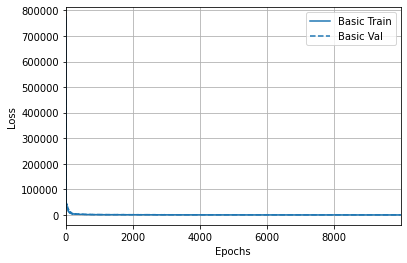

In [174]:
#LOSE
plotter.plot({'Basic': history}, metric = 'loss')
plt.show()

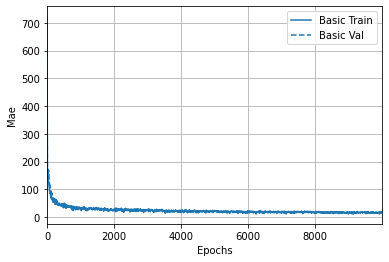

In [175]:
#Mean Absolute Error
plotter.plot({'Basic': history}, metric = 'mae')
plt.show()

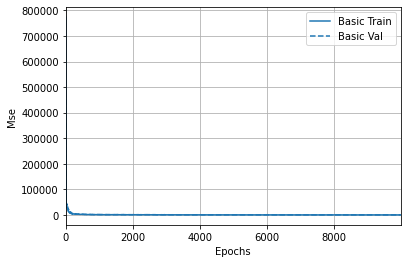

In [176]:
#Mean Square Error
plotter.plot({'Basic': history}, metric = "mse")
plt.show()

In [177]:
#Calculate Lose, Mae, Mse
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

2/2 - 0s - loss: 711.8024 - mae: 26.3123 - mse: 711.8024


In [178]:
print("Testing set Mean Abs Error: {:5.2f} ANN".format(mae))

Testing set Mean Abs Error: 26.31 ANN


In [179]:
model.load_weights(ch_path)
loss, mae, mse = model.evaluate(test_dataset, test_labels)
print('restored model, accuracy: {:5.2f} ANN'.format(mae))

2/2 [==============================] - 0s 2ms/step - loss: 711.8024 - mae: 26.3123 - mse: 711.8024
restored model, accuracy: 26.31 ANN


In [180]:
ch_path_2 = ('save/cp-{epoch:04d}.ckpt')
cp_dir_2 = os.path.dirname(ch_path_2)

In [181]:
cp_callback_2 = tf.keras.callbacks.ModelCheckpoint(ch_path_2, 
                                                   save_weights_only =  True, 
                                                   verbose = 1,
                                                   period = 50)
model = build_model()

In [182]:
#Train the model
history = model.fit(train_dataset, train_labels, validation_split = 0.2,
                      epochs=EPOCHS,  batch_size=32 ,verbose=0,
                      validation_data=(test_dataset, test_dataset), 
                      callbacks = [cp_callback_2])


Epoch 00050: saving model to save/cp-0050.ckpt

Epoch 00100: saving model to save/cp-0100.ckpt

Epoch 00150: saving model to save/cp-0150.ckpt

Epoch 00200: saving model to save/cp-0200.ckpt

Epoch 00250: saving model to save/cp-0250.ckpt

Epoch 00300: saving model to save/cp-0300.ckpt

Epoch 00350: saving model to save/cp-0350.ckpt

Epoch 00400: saving model to save/cp-0400.ckpt

Epoch 00450: saving model to save/cp-0450.ckpt

Epoch 00500: saving model to save/cp-0500.ckpt

Epoch 00550: saving model to save/cp-0550.ckpt

Epoch 00600: saving model to save/cp-0600.ckpt

Epoch 00650: saving model to save/cp-0650.ckpt

Epoch 00700: saving model to save/cp-0700.ckpt

Epoch 00750: saving model to save/cp-0750.ckpt

Epoch 00800: saving model to save/cp-0800.ckpt

Epoch 00850: saving model to save/cp-0850.ckpt

Epoch 00900: saving model to save/cp-0900.ckpt

Epoch 00950: saving model to save/cp-0950.ckpt

Epoch 01000: saving model to save/cp-1000.ckpt

Epoch 01050: saving model to save/cp-10


Epoch 08600: saving model to save/cp-8600.ckpt

Epoch 08650: saving model to save/cp-8650.ckpt

Epoch 08700: saving model to save/cp-8700.ckpt

Epoch 08750: saving model to save/cp-8750.ckpt

Epoch 08800: saving model to save/cp-8800.ckpt

Epoch 08850: saving model to save/cp-8850.ckpt

Epoch 08900: saving model to save/cp-8900.ckpt

Epoch 08950: saving model to save/cp-8950.ckpt

Epoch 09000: saving model to save/cp-9000.ckpt

Epoch 09050: saving model to save/cp-9050.ckpt

Epoch 09100: saving model to save/cp-9100.ckpt

Epoch 09150: saving model to save/cp-9150.ckpt

Epoch 09200: saving model to save/cp-9200.ckpt

Epoch 09250: saving model to save/cp-9250.ckpt

Epoch 09300: saving model to save/cp-9300.ckpt

Epoch 09350: saving model to save/cp-9350.ckpt

Epoch 09400: saving model to save/cp-9400.ckpt

Epoch 09450: saving model to save/cp-9450.ckpt

Epoch 09500: saving model to save/cp-9500.ckpt

Epoch 09550: saving model to save/cp-9550.ckpt

Epoch 09600: saving model to save/cp-96

In [186]:
latest_model = tf.train.latest_checkpoint(cp_dir_2)
latest_model

'save/my_save'

In [187]:
#save
model.save_weights('./save/my_save')

In [188]:
#restore
model = build_model()
model.load_weights('./save/my_save')

In [189]:
loss, mae, mse = model.evaluate(test_dataset, test_labels)
print('restored model, accuracy: {:5.2f} ANN'.format(mae))

2/2 [==============================] - 0s 1ms/step - loss: 677.6545 - mae: 25.7468 - mse: 677.6545
restored model, accuracy: 25.75 ANN


In [190]:
model = build_model()
new_history = model.fit(train_dataset, train_labels, epochs=EPOCHS,
                     validation_split = 0.2, batch_size=32 ,verbose=0,
                    callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:1605869.8750,  mae:1247.6813,  mse:1605869.8750,  val_loss:951327.7500,  val_mae:951.6967,  val_mse:951327.7500,  
....................................................................................................
Epoch: 100, loss:13543.2148,  mae:90.2326,  mse:13543.2148,  val_loss:8582.6797,  val_mae:75.6208,  val_mse:8582.6797,  
....................................................................................................
Epoch: 200, loss:1930.5427,  mae:34.9640,  mse:1930.5427,  val_loss:3660.6187,  val_mae:49.4792,  val_mse:3660.6187,  
....................................................................................................
Epoch: 300, loss:6183.3286,  mae:75.4235,  mse:6183.3286,  val_loss:1542.7631,  val_mae:30.5085,  val_mse:1542.7631,  
....................................................................................................
Epoch: 400, loss:2451.1936,  mae:47.3596,  mse:2451.1936,  val_loss:3454.6174,  val_mae:52.6746,  val_mse:

....................................................................................................
Epoch: 3800, loss:859.2529,  mae:28.6497,  mse:859.2529,  val_loss:443.2610,  val_mae:20.7412,  val_mse:443.2610,  
....................................................................................................
Epoch: 3900, loss:209.5372,  mae:13.9269,  mse:209.5372,  val_loss:651.7064,  val_mae:25.4140,  val_mse:651.7064,  
....................................................................................................
Epoch: 4000, loss:1291.5760,  mae:35.2759,  mse:1291.5760,  val_loss:1952.2709,  val_mae:43.6882,  val_mse:1952.2709,  
....................................................................................................
Epoch: 4100, loss:713.6516,  mae:26.2467,  mse:713.6516,  val_loss:873.8743,  val_mae:29.4080,  val_mse:873.8743,  
....................................................................................................
Epoch: 4200, loss:31.2536, 

....................................................................................................
Epoch: 7600, loss:492.1461,  mae:21.8204,  mse:492.1461,  val_loss:1306.6077,  val_mae:35.8211,  val_mse:1306.6077,  
....................................................................................................
Epoch: 7700, loss:38.8001,  mae:5.7283,  mse:38.8001,  val_loss:381.7060,  val_mae:19.2568,  val_mse:381.7060,  
....................................................................................................
Epoch: 7800, loss:218.9912,  mae:14.5577,  mse:218.9912,  val_loss:207.3258,  val_mae:14.1022,  val_mse:207.3258,  
....................................................................................................
Epoch: 7900, loss:203.0961,  mae:14.0795,  mse:203.0961,  val_loss:859.5701,  val_mae:29.1316,  val_mse:859.5701,  
....................................................................................................
Epoch: 8000, loss:1723.5344,  ma

In [191]:
#save entire model to a HDF5 file
model.save('saved model/my_model.h5')

In [192]:
#Load model
new_model = keras.models.load_model('saved model/my_model.h5')
new_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_41 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_42 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 65        
Total params: 9,281
Trainable params: 9,281
Non-trainable params: 0
_________________________________________________________________


In [193]:
loss, mae, mse = new_model.evaluate(test_dataset, test_labels)
print('restored model, accuracy: {:5.2f} ANN'.format(mae))

2/2 [==============================] - 0s 970us/step - loss: 210.1592 - mean_absolute_error: 14.3365 - mean_squared_error: 210.1592
restored model, accuracy: 14.34 ANN


In [194]:
#Visualize the model's
new_model_hist = pd.DataFrame(new_history.history)
new_model_hist['epoch'] = new_history.epoch
print('Model History:')
new_model_hist

Model History:


,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,1.605870e+06,1247.681274,1.605870e+06,951327.750000,951.696716,951327.750000,0
1,7.946836e+05,865.871765,7.946836e+05,461100.500000,647.014465,461100.500000,1
2,3.641974e+05,571.608887,3.641974e+05,161594.703125,358.646667,161594.703125,2
3,1.189792e+05,291.271790,1.189792e+05,61562.386719,207.760147,61562.386719,3
4,4.484060e+04,164.356552,4.484060e+04,35348.691406,154.825485,35348.691406,4
...,...,...,...,...,...,...,...
9995,6.079736e+01,7.637842,6.079736e+01,6.841778,2.435694,6.841778,9995
9996,7.057489e+00,2.426991,7.057489e+00,6.027632,2.238892,6.027632,9996
9997,8.685709e+00,2.636354,8.685709e+00,46.373802,6.714337,46.373802,9997
9998,1.188166e+02,10.131425,1.188166e+02,2522.745361,49.785648,2522.745361,9998


In [195]:
#Plot The Model 
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

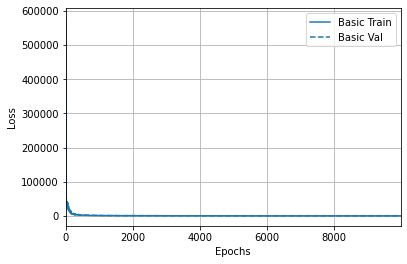

In [196]:
#LOSE
plotter.plot({'Basic': new_history}, metric = 'loss')
plt.show()

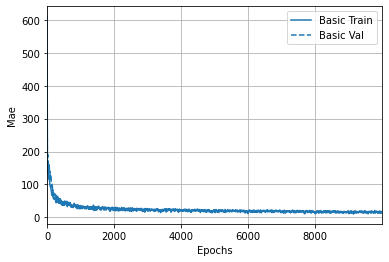

In [197]:
#Mean Absolute Error
plotter.plot({'Basic': new_history}, metric = 'mae')
plt.show()

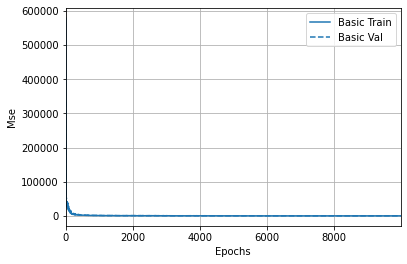

In [198]:
#Mean Square Error
plotter.plot({'Basic': new_history}, metric = "mse")
plt.show()

In [199]:
#Calculate Lose, Mae, Mse
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

2/2 - 0s - loss: 210.1592 - mae: 14.3365 - mse: 210.1592


In [200]:
print("Testing set Mean Abs Error: {:5.2f} ANN".format(mae))

Testing set Mean Abs Error: 14.34 ANN


In [201]:
#Prediction
predictions = new_model.predict(test_dataset).flatten()

In [202]:
predictions

array([1399.0414, 1840.829 , 1313.5422, 1671.3252, 1721.2413, 1535.857 ,
       1349.958 , 1371.4288, 1283.2567, 1376.71  , 1543.8153, 1628.7375,
       1833.6106, 1276.4004, 1130.6151, 1611.9099, 1664.7888, 2116.7905,
       1751.2164, 1891.1744, 1534.4374, 1924.9664, 1121.1814, 1477.0645,
       1848.123 , 1695.5133, 1641.6262, 1584.0024, 1618.8743, 1959.5131,
       1702.1438, 1281.1499, 1273.9948, 1543.0043, 1440.8323],
      dtype=float32)

In [203]:
r2_Score = r2_score(actual, predictions)
print('Score: %0.3f' % r2_Score)

Score: 0.996


In [204]:
rmse = sqrt(mean_squared_error(actual, predictions))
print('Root Mean Squared Error = %0.3f' % rmse)

Root Mean Squared Error = 14.497


In [205]:
#Mean Squared Error
mse = mean_squared_error(actual, predictions)
print('Mean Squared Error = %0.3f' % mse)

Mean Squared Error = 210.159


In [206]:
#Mean Absolute Error
mae = mean_absolute_error(actual, predictions)
print('Mean Absolute Error = %0.3f' % mae)

Mean Absolute Error = 14.336


In [207]:
#Median Absolute Error
med_ea = median_absolute_error(actual, predictions)
print('Median Absolute Error = %0.3f' % med_ea)

Median Absolute Error = 13.832


In [208]:
#Mean Squared Log Error
msle = mean_squared_log_error(actual, predictions)
print('Mean Squared Log Error = %0.3f' % msle)

Mean Squared Log Error = 0.000


In [209]:
#Max Error
me = max_error(actual, predictions)
print('Max Error = %0.3f' % me)

Max Error = 20.711


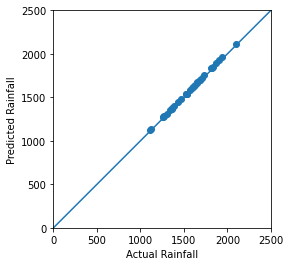

In [210]:
#Plot True Values vs. Predictions
a = plt.axes(aspect='equal')
plt.scatter(test_labels, predictions)
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
lims = [0,2500]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)
plt.show()

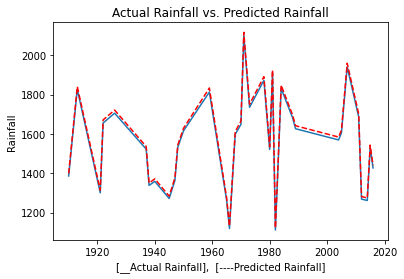

In [211]:
#Plot Actuall vs. Prediction
plt.title('Actual Rainfall vs. Predicted Rainfall')
plt.plot(year, actual)
plt.plot(year, predictions, 'r--')
plt.xlabel('[__Actual Rainfall],  [----Predicted Rainfall]')
plt.ylabel('Rainfall')
plt.show()

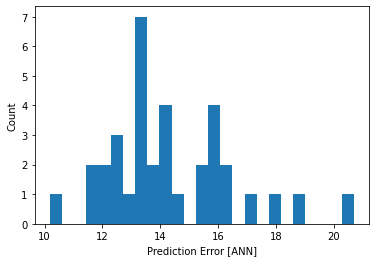

In [212]:
#Plot Prediction Error vs.Count
error = predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [ANN]")
_ = plt.ylabel("Count")
plt.show()

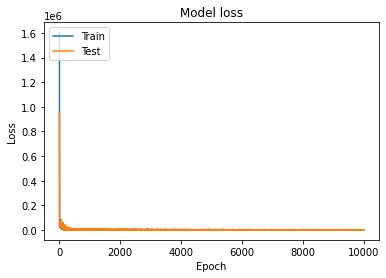

In [213]:
# Plot training & validation loss values
plt.plot(new_history.history['loss'])
plt.plot(new_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

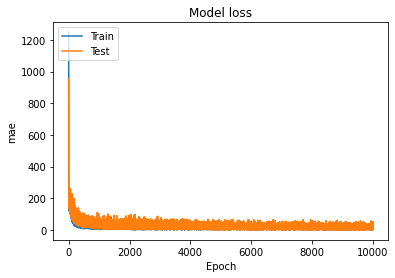

In [214]:
# Plot training & validation loss values
plt.plot(new_history.history['mae'])
plt.plot(new_history.history['val_mae'])
plt.title('Model loss')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

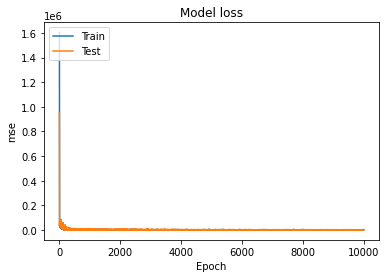

In [215]:
# Plot training & validation loss values
plt.plot(new_history.history['mse'])
plt.plot(new_history.history['val_mse'])
plt.title('Model loss')
plt.ylabel('mse')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [216]:
def Average(lst):
 return sum(lst) / len(lst) 

In [217]:
loss = new_history.history['loss']
mae = new_history.history['mae']
mse = new_history.history['mse']

In [218]:
avg_loss = Average(loss)
avg_mae = Average(mae)
avg_mse = Average(mse)

In [219]:
rmse = math.sqrt(avg_mse)
rmae = math.sqrt(avg_mse)

In [220]:
print('Loss = %0.3f' % avg_loss)
print('MAE = %0.3f' % avg_mae)
print('MSE = %0.3f' % avg_mse)
print('RMSE = %0.3f' % rmse)
print('RMSE = %0.3f' % rmae)

Loss = 1353.120
MAE = 23.465
MSE = 1353.120
RMSE = 36.785
RMSE = 36.785
